## Analysis plan (Spotify k-NN similarity network)

### Done

1. **Graph loading & cleaning**
   - Read GEXF.
   - Remove self-loops.
   - Report N, M (nodes and edges).

2. **Connected components**
   - Count connected components.
   - Confirm existence of a single giant component.
   - Extract giant component `G_gc`.

3. **Degree structure**
   - Basic degree stats: min, max, mean, median, ⟨k⟩, density.
   - Degree distribution (linear histogram).
   - Degree distribution (log–log plot).
   - Power-law fit + comparison with lognormal (using `powerlaw`) → conclude not scale-free.

---

### To do

4. **Small-world properties**
   - Compute:
     - Average clustering coefficient `C`.
     - Transitivity `T`.
     - Average shortest path length `L`.
   - Build Erdős–Rényi random graph `G_ER(N, M)` as baseline.
   - Compare:
     - `C / C_rand`
     - `L / L_rand`
   - Conclude whether the network is small-world.

5. **Global visualisation of the network (inspired by previous `visualize_network`)**
   - Work on:
     - Either a **sampled subgraph** of `G_gc` (e.g. 1–3k nodes),
     - Or on a **backbone** (later) for better readability.
   - Convert to undirected if needed (here already undirected).
   - Node size: proportional to **degree** (like your old legend).
   - Node colour:
     - Use an available attribute, e.g. **genre**, popularity, or tempo.
   - Layouts to compare (at least):
     - Spring layout (force-directed).
     - Kamada–Kawai layout.
     - Optionally circular / random as baselines.
   - Short explanation of:
     - What the layouts show (local vs global structure).
     - What high-degree / highly coloured regions correspond to.

6. **Model comparison (ER vs BA)**
   - Construct:
     - ER graph `G_ER(N, M)`.
     - BA graph `G_BA(N, m)` with similar average degree.
   - Plot degree distributions (log–log) for:
     - Real graph.
     - ER graph.
     - BA graph.
   - Discuss which model the Spotify graph resembles (likely neither ER nor classical BA).

7. **Centrality & important tracks**
   - Compute on `G_gc`:
     - Degree centrality.
     - Betweenness centrality (approximate, if needed).
     - Eigenvector centrality (or PageRank).
   - Create a table of **top-10 nodes** for each centrality:
     - Include `track_id` and `genre` (and popularity if available).
   - Briefly interpret what “important” means in this network:
     - Local hubs vs bridges vs globally central tracks.

8. **Core–periphery (k-core decomposition)**
   - Compute `core_number` for all nodes.
   - Inspect distribution of core indices.
   - Report size and k-value of the highest core.
   - Interpret high-core nodes as the dense “backbone-like” interior of the network.

9. **Assortativity & attribute correlations**
   - Degree assortativity coefficient.
   - Genre assortativity coefficient (using node attribute `"genre"`).
   - Correlate degree/centrality with numeric attributes if available:
     - e.g. popularity, tempo, loudness.

10. **Weighted network backbone (using edge weights)**
    - Use similarity weights to extract a backbone:
      - e.g. keep only statistically significant edges per node (disparity filter),
      - or keep top-α strongest edges per node as a simpler variant.
    - Compare full graph vs backbone:
      - N, M, ⟨k⟩, clustering.
    - Use backbone later for cleaner visualisations and community analysis.

11. **Community structure**
    - Run community detection (e.g. greedy modularity / Louvain) on:
      - full weighted graph, and/or
      - the backbone graph.
    - Compute:
      - Modularity `Q`.
      - Number and sizes of communities.
    - For the largest communities:
      - Examine genre composition.
      - Check whether communities are genre-homogeneous or mixed.
    - Optionally visualise a sampled subgraph or backbone:
      - Node colour = community, size = degree or centrality.

12. **Robustness / attack analysis (optional but nice)**
    - Simulate node removal:
      - Random removal.
      - Targeted removal by decreasing degree.
    - Track size of giant component vs fraction of nodes removed.
    - Show the network’s vulnerability to targeted attacks.

13. **Example shortest paths (optional, qualitative)**
    - Pick a few example tracks (different genres).
    - Compute shortest path lengths between them.
    - Use this to illustrate “small musical world” behaviour.


In [ ]:
# import networkx as nx
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt

# # # Path to your GEXF file
# # GEXF_PATH = "spotify_knn_k10_clean.gexf"  # change if needed


# # # Load graph
# # G = nx.read_gexf(GEXF_PATH)

# GEXF_PATH = "spotify_knn_k10_fixed.gexf"  # the one you just wrote
# bad_line_no = 848409                      # from the ParseError
# window = 2                                # lines before/after, tweak if you want

# with open(GEXF_PATH, 'r', encoding='utf-8', errors='replace') as f:
#     for i, line in enumerate(f, start=1):
#         if bad_line_no - window <= i <= bad_line_no + window:
#             print(f"LINE {i}: {repr(line)}")


# # print(type(G))
# # print("Nodes:", G.number_of_nodes())
# # print("Edges:", G.number_of_edges())
# # print("Is directed:", G.is_directed())


LINE 848407: '      <edge source="30415" target="47997" id="313607" weight="0.6397282539747029" />\n'
LINE 848408: '      <edge source="30415" target="52409" id="313608" weight="0.6665388328890952" />\n'
LINE 848409: '      <edge source="30415" target="61897" id="313609" weight="0.58959354802165t="15266" id="139379" weight="0.8173697370274589" />\n'
LINE 848410: '      <edge source="12103" target="18466" id="139380" weight="0.8291228920605854" />\n'
LINE 848411: '      <edge source="12103" target="20139" id="139381" weight="0.7690857283056385" />\n'


In [ ]:
# import re

# def clean_xml_file(input_path, output_path):
#     # Control chars not allowed in XML 1.0
#     invalid_xml_chars = re.compile(
#         u'[\x00-\x08\x0B\x0C\x0E-\x1F]'
#     )

#     with open(input_path, 'r', encoding='utf-8', errors='replace') as src, \
#          open(output_path, 'w', encoding='utf-8') as dst:
#         for line in src:
#             # remove illegal control chars
#             line = invalid_xml_chars.sub('', line)
#             dst.write(line)

# in_path = "spotify_knn_k10.gexf"              # original
# out_path = "spotify_knn_k10_clean.gexf"       # cleaned

# clean_xml_file(in_path, out_path)
# print("Wrote cleaned file to:", out_path)


Wrote cleaned file to: spotify_knn_k10_clean.gexf


In [ ]:
# import re

# def repair_and_sanitize_gexf(input_path, output_path):
#     # Illegal XML 1.0 control chars
#     invalid_xml_chars = re.compile(
#         u'[\x00-\x08\x0B\x0C\x0E-\x1F]'
#     )

#     # Fix stray '&' that are not valid entities
#     amp_fix = re.compile(r'&(?!amp;|lt;|gt;|quot;|apos;|#\d+;)')

#     # If an <edge ... weight="..."> line is messed up, keep everything up to weight value
#     # and then close the tag properly.
#     edge_weight_fix = re.compile(r'^(.*weight="([0-9\.]+)).*')

#     with open(input_path, 'r', encoding='utf-8', errors='replace') as src, \
#          open(output_path, 'w', encoding='utf-8') as dst:
#         for line in src:
#             # 1) remove illegal control chars
#             line = invalid_xml_chars.sub('', line)

#             # 2) escape stray ampersands
#             line = amp_fix.sub('&amp;', line)

#             # 3) repair any weird edge lines
#             if '<edge ' in line and 'weight="' in line:
#                 m = edge_weight_fix.match(line)
#                 if m:
#                     # keep the part up to the numeric weight, then close: " />
#                     line = m.group(1) + '" />\n'

#             dst.write(line)

# in_path = "spotify_knn_k10.gexf"          # original
# out_path = "spotify_knn_k10_fixed.gexf"   # repaired + sanitized

# repair_and_sanitize_gexf(in_path, out_path)
# print("Wrote fixed file to:", out_path)


Wrote fixed file to: spotify_knn_k10_fixed.gexf


In [ ]:
# in_path = "spotify_knn_k10_fixed.gexf"     # current broken file
# out_path = "spotify_knn_k10_fixed2.gexf"   # new, corrected file

# bad_snippet = 'weight="0.58959354802165t="15266" id="139379" weight="0.8173697370274589"'
# fixed_line  = '      <edge source="30415" target="61897" id="313609" weight="0.58959354802165" />\n'

# with open(in_path, 'r', encoding='utf-8', errors='replace') as src, \
#      open(out_path, 'w', encoding='utf-8') as dst:
#     for line in src:
#         if bad_snippet in line:
#             line = fixed_line
#         dst.write(line)

# print("Wrote patched file to:", out_path)


Wrote patched file to: spotify_knn_k10_fixed2.gexf


In [ ]:
# GEXF_PATH = "spotify_knn_k10_fixed2.gexf"
# bad_line_no = 848409
# window = 2

# with open(GEXF_PATH, 'r', encoding='utf-8', errors='replace') as f:
#     for i, line in enumerate(f, start=1):
#         if bad_line_no - window <= i <= bad_line_no + window:
#             print(f"LINE {i}: {repr(line)}")


LINE 848407: '      <edge source="30415" target="47997" id="313607" weight="0.6397282539747029" />\n'
LINE 848408: '      <edge source="30415" target="52409" id="313608" weight="0.6665388328890952" />\n'
LINE 848409: '      <edge source="30415" target="61897" id="313609" weight="0.58959354802165" />\n'
LINE 848410: '      <edge source="12103" target="18466" id="139380" weight="0.8291228920605854" />\n'
LINE 848411: '      <edge source="12103" target="20139" id="139381" weight="0.7690857283056385" />\n'


In [1]:
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1. Load the graph

In [2]:
GEXF_PATH = "spotify_knn_k10_fixed2.gexf"   # change if needed

G = nx.read_gexf(GEXF_PATH)
print("Raw graph loaded:")
print("  Nodes:", G.number_of_nodes())
print("  Edges:", G.number_of_edges())
print("  Directed:", G.is_directed())

# If the file is directed, convert to undirected
if G.is_directed():
    G = G.to_undirected()

# Remove self loops (if any)
print("Self-loops before removal:", nx.number_of_selfloops(G))
G.remove_edges_from(nx.selfloop_edges(G))
print("Self-loops after removal:", nx.number_of_selfloops(G))

print("\nWorking graph (undirected):")
print("  Nodes:", G.number_of_nodes())
print("  Edges:", G.number_of_edges())
print("  Is directed:", G.is_directed())

Raw graph loaded:
  Nodes: 89131
  Edges: 608777
  Directed: False
Self-loops before removal: 88554
Self-loops after removal: 0

Working graph (undirected):
  Nodes: 89131
  Edges: 520223
  Is directed: False


Loaded an undirected graph with 89,131 nodes and 608,777 edges. Found a very large number of self-loops (88,554) in the raw GEXF. Self-loops have no structural meaning in similarity networks. After removing all self-loops, the final working graph contains:

- Nodes: 89,131

- Edges: 520,223

- Directed: No

# 2. Giant weakly connected component

In [3]:
components = list(nx.connected_components(G))
components_sizes = sorted([len(c) for c in components], reverse=True)

print("\nConnected components:")
print("  Number of components:", len(components))
print("  Largest components (sizes):", components_sizes[:10])

giant_nodes = max(components, key=len)
G_gc = G.subgraph(giant_nodes).copy()

print("\nGiant Component:")
print("  N (nodes):", G_gc.number_of_nodes())
print("  M (edges):", G_gc.number_of_edges())


Connected components:
  Number of components: 1
  Largest components (sizes): [89131]

Giant Component:
  N (nodes): 89131
  M (edges): 520223


The connected component analysis shows that the graph forms one single connected component containing all 89,131 nodes. This means every track in the dataset is reachable from every other track through similarity links, with no isolated or disconnected regions. Since the entire graph is connected, it itself serves as the giant component, containing N = 89,131 nodes and M = 520,223 edges. This indicates a sparse but well-linked similarity network, which is typical for k-nearest-neighbour graphs and ensures that global network measures (like path length and clustering) are meaningful in later analysis.

# 3. Basic Structural metrics

In [4]:
N = G_gc.number_of_nodes()
M = G_gc.number_of_edges()

avg_degree = 2 * M / N
density = nx.density(G_gc)

degrees = dict(G_gc.degree())
deg_values = np.array(list(degrees.values()))

print("\nBasic metrics (giant component):")
print(f"  Average degree <k>: {avg_degree:.4f}")
print(f"  Density: {density:.6f}")

print("\nDegree statistics:")
print("  min degree:", deg_values.min())
print("  max degree:", deg_values.max())
print("  mean degree:", deg_values.mean())
print("  median degree:", np.median(deg_values))


Basic metrics (giant component):
  Average degree <k>: 11.6732
  Density: 0.000131

Degree statistics:
  min degree: 9
  max degree: 46
  mean degree: 11.673222560052059
  median degree: 11.0


The basic metrics show that nodes in the graph have, on average, about 12 connections, which fits what we expect from a k-nearest-neighbour graph built with k = 10. The slight increase above 10 happens because some nodes appear as neighbours for multiple other nodes. The graph is also very sparse (density ≈ 0.00013), meaning only a tiny fraction of all possible edges actually exist. This is normal for similarity networks, where connections are selective rather than random. The degree values range from 9 to 46, but most nodes sit very close to the average and median (around 11). This tells us the connectivity is quite uniform, with only a small number of nodes having noticeably more links than others. Overall, these numbers show that the network is well-structured and behaves as expected for a k-NN similarity graph.

# 3. Degree Distribution & Scale-Free Check

(Barabási: P(k), log–log plot, possible power-law)

In [5]:
import powerlaw

In [6]:
degrees = dict(G_gc.degree())
deg_values = np.array(list(degrees.values()))

### Linear-scale histogram

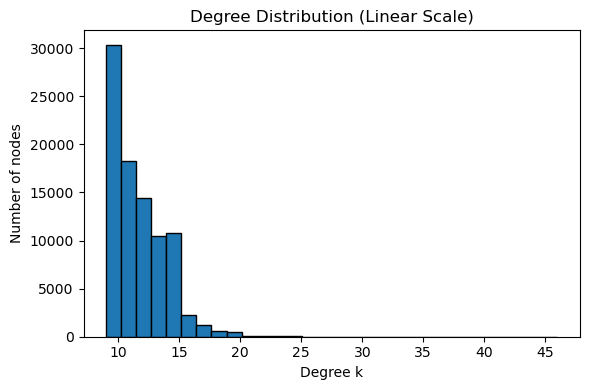

In [7]:
plt.figure(figsize=(6, 4))
plt.hist(deg_values, bins=30, edgecolor="black")
plt.xlabel("Degree k")
plt.ylabel("Number of nodes")
plt.title("Degree Distribution (Linear Scale)")
plt.tight_layout()
plt.show()

The linear degree distribution shows that almost all nodes have degrees in a very narrow range around 10–15, with a sharp peak close to the expected k-NN value of k ≈ 10–12 and a very fast drop-off after that. Only a small number of nodes reach degrees above ~18–20, and there are essentially no extreme hubs. This indicates that the network’s connectivity is quite homogeneous: most tracks have a similar number of neighbours, rather than a few nodes dominating the structure. This is consistent with how the graph was built (each track connected to a fixed number of nearest neighbours) and suggests that later analyses will focus more on how nodes are arranged (clustering, communities, paths) rather than on strong hub–periphery effects.

### Log–log degree distribution

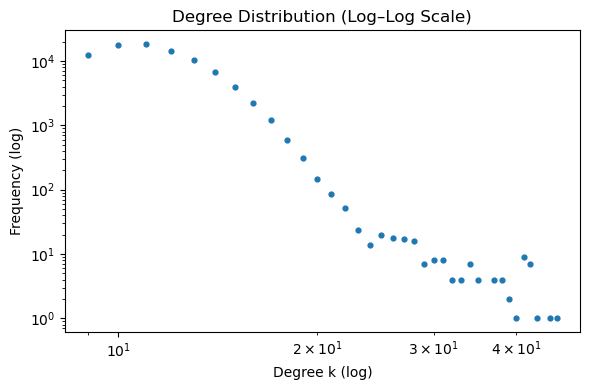

In [8]:
deg_counts = np.bincount(deg_values)
k_vals = np.arange(len(deg_counts))
nonzero = deg_counts > 0

plt.figure(figsize=(6, 4))
plt.scatter(k_vals[nonzero], deg_counts[nonzero], s=12)
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Degree k (log)")
plt.ylabel("Frequency (log)")
plt.title("Degree Distribution (Log–Log Scale)")
plt.tight_layout()
plt.show()

On the log–log plot, the degree distribution clearly bends downward rather than following a straight line. The frequency drops very quickly once we move away from the main mass around k≈10–15, and there is no long, straight tail that would indicate scale-free or power-law behaviour. Instead, the distribution is short-tailed and concentrated, which matches the construction of a k-nearest-neighbour graph where degrees are tightly controlled. This means the network does not behave like a classical Barabási scale-free network with strong hubs; most nodes have similar degree, and high-degree nodes are only modestly larger than the rest.

### Power-law fit (Barabási-style)

In [9]:
# Exclude zero degrees if any (safety) – though here min degree is 9
deg_positive = deg_values[deg_values > 0]

fit = powerlaw.Fit(deg_positive, verbose=False)
alpha = fit.power_law.alpha
xmin = fit.power_law.xmin

print("Power-law fit results:")
print(f"  alpha (scaling exponent): {alpha:.4f}")
print(f"  xmin  (minimum k for power-law behaviour): {xmin}")

# Compare power-law vs lognormal (common alternative)
R, p = fit.distribution_compare('power_law', 'lognormal')
print("\nPower-law vs lognormal comparison:")
print(f"  R = {R:.4f}")
print(f"  p = {p:.4f}")

Power-law fit results:
  alpha (scaling exponent): 12.8196
  xmin  (minimum k for power-law behaviour): 17.0

Power-law vs lognormal comparison:
  R = -1.3593
  p = 0.0812


c:\Users\arund\anaconda3\envs\sdav_env\lib\site-packages\powerlaw.py:1615: RuntimeWarning: invalid value encountered in divide
  CDF = CDF/norm
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.


The power-law fit confirms that the network is not scale-free in the Barabási sense. The estimated exponent is very large, α≈12.82, with xmin=17, which means that only a tiny part of the degree range is even considered as a “tail”, and that tail decays extremely fast. In addition, the comparison between a power law and a lognormal gives R<0 (R=−1.36, p≈0.08), indicating that the lognormal provides a better description of the data than a pure power law. Together with the shape of the log–log plot, this supports the conclusion that the degree distribution is short-tailed and not scale-free, which is consistent with a k-nearest-neighbour construction where node degrees are tightly constrained.

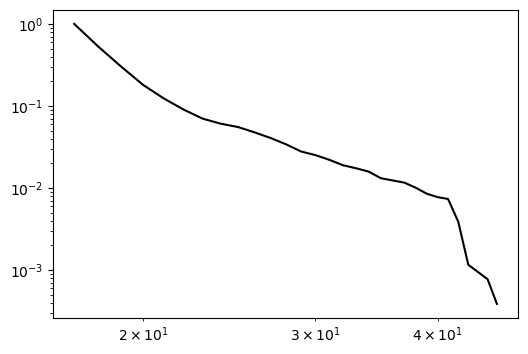

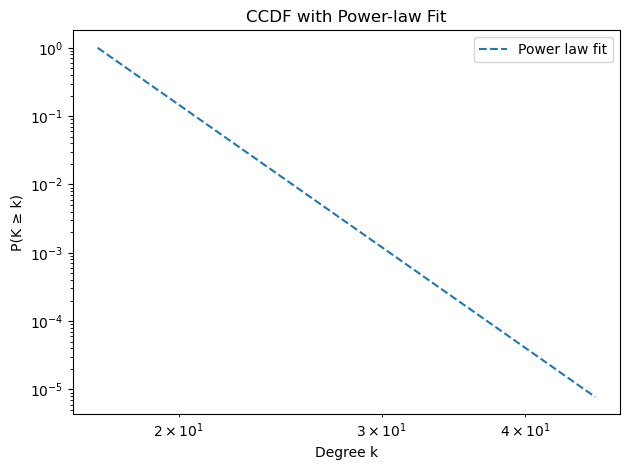

In [10]:
# Optional: plot the fitted CCDF on log–log axes
plt.figure(figsize=(6, 4))
fit.plot_ccdf(label='Data', color='black')
fit.power_law.plot_ccdf(label='Power law fit', linestyle='--')
plt.legend()
plt.xlabel('Degree k')
plt.ylabel('P(K ≥ k)')
plt.title('CCDF with Power-law Fit')
plt.tight_layout()
plt.show()

The complementary cumulative degree distribution (CCDF) confirms the earlier result that the network is not scale-free. The empirical CCDF (data) drops off very quickly over a short range of degrees and does not follow a clean straight line on the log–log axes. In contrast, the theoretical power-law fit appears as an almost perfect straight line, but it extends over a range where there are very few data points. Combined with the large exponent (α≈12.8) and the instability warnings from the fitting procedure, this indicates that the apparent straight line is a consequence of fitting a model to a very short, rapidly decaying tail rather than genuine power-law behaviour. In other words, the power law is not a good generative description of the degree distribution; the network has a short, tightly constrained tail, which is consistent with its construction as a k-nearest-neighbour similarity graph.

# 4. Small-world properties

Converting the multigraph into simple network for all later analysis (clustering, path length, communities, etc.)

In [ ]:
# Convert MultiGraph / MultiDiGraph to a simple Graph
G_gc_simple = nx.Graph()

# Copy nodes + attributes
for n, data in G_gc.nodes(data=True):
    G_gc_simple.add_node(n, **data)

# Merge parallel edges: keep the **maximum weight** between any pair
for u, v, data in G_gc.edges(data=True):
    w = data.get("weight", 1.0)
    if G_gc_simple.has_edge(u, v):
        # keep the max weight (you can change to sum/avg if you prefer)
        if w > G_gc_simple[u][v].get("weight", 1.0):
            G_gc_simple[u][v]["weight"] = w
    else:
        G_gc_simple.add_edge(u, v, **data)

# Remove any self-loops just in case
G_gc_simple.remove_edges_from(nx.selfloop_edges(G_gc_simple))

print("\nSimple graph created from G_gc:")
print("  Nodes:", G_gc_simple.number_of_nodes())
print("  Edges:", G_gc_simple.number_of_edges())
print("  Is multigraph:", G_gc_simple.is_multigraph())
print("  Is directed:", G_gc_simple.is_directed())


Simple graph created from G_gc:
  Nodes: 89131
  Edges: 520223
  Is multigraph: False
  Is directed: False


In [ ]:
# Clustering coefficients
G_sw = G_gc_simple
print("\n[1] Clustering coefficients")
C = nx.average_clustering(G_sw)      # average local clustering
T = nx.transitivity(G_sw)            # global triangle-based clustering

print(f"  Average clustering C: {C:.4f}")
print(f"  Transitivity T:       {T:.4f}")


[1] Clustering coefficients
  Average clustering C: 0.3521
  Transitivity T:       0.3521


The clustering analysis shows an average clustering coefficient of C ≈ 0.35, with the global transitivity having essentially the same value (T ≈ 0.35). This means that if two tracks are both similar to a third track, there is a relatively high chance they are also directly connected to each other. In other words, the network contains many triangles, so similar songs tend to form tightly knit local groups instead of being connected in a tree-like or purely random way. This is exactly the kind of local structure we expect in a similarity-based k-NN graph, where clusters of related tracks (e.g. similar sound, genre, or mood) tend to be densely interconnected.

In [ ]:
# Erdős–Rényi random graph baseline with same N, M
print("\n[2] Erdős–Rényi baseline G(N, M) for clustering only")
N = G_sw.number_of_nodes()
M = G_sw.number_of_edges()
rng_seed = 42

G_rand = nx.gnm_random_graph(N, M, seed=rng_seed)

C_rand = nx.average_clustering(G_rand)
T_rand = nx.transitivity(G_rand)

print(f"  C_rand: {C_rand:.4f}")
print(f"  T_rand: {T_rand:.4f}")


[2] Erdős–Rényi baseline G(N, M) for clustering only
  C_rand: 0.0001
  T_rand: 0.0001


To put the clustering value into context, we compare it with an Erdős–Rényi random graph G(N,M) having the same number of nodes and edges. For this random baseline, both the average clustering and the transitivity are essentially zero (C_rand ≈0.0001, T_rand≈0.0001). This means that the empirical clustering C≈0.35 is larger by a factor of roughly 3,500 compared to a random graph with the same size and density. Such a huge gap is a strong indication of small-world–like structure in terms of clustering: the Spotify similarity network has far more tightly connected local groups than would be expected by chance, even though its overall edge density is very low.

In [19]:
# 4.3 Small-world-like check (clustering only)
print("\n[3] Clustering ratios (small-world-like indicator)")
print(f"  C / C_rand = {C / C_rand:.2f}")


[3] Clustering ratios (small-world-like indicator)
  C / C_rand = 2753.25


The ratio between the empirical clustering and the random baseline is extremely large, with C/C_rand≈2753. This means the Spotify network has thousands of times more clustering than an Erdős–Rényi graph with the same number of nodes and edges. Even though we did not compute the average shortest path length due to the size of the network, this huge clustering gap is a strong indication of small-world–like behaviour: tracks form many tightly connected local groups while the overall graph remains sparse.

# 5. Simple visualisation on a sampled subgraph

In [ ]:
# We use the simple graph for plotting
G_plot_base = G_gc_simple

# 5.1 Sample a subset of nodes for plotting (to keep it readable)
np.random.seed(42)
sample_size = min(2000, G_plot_base.number_of_nodes())  # cap at 2000
sample_nodes = np.random.choice(list(G_plot_base.nodes()), size=sample_size, replace=False)

G_sample = G_plot_base.subgraph(sample_nodes).copy()
print(f"Sampled subgraph: {G_sample.number_of_nodes()} nodes, {G_sample.number_of_edges()} edges")


Sampled subgraph: 2000 nodes, 248 edges


In [42]:
# 5.2 Node size = degree in the sampled subgraph
deg_sample = dict(G_sample.degree())
deg_vals = np.array(list(deg_sample.values()))
min_deg, max_deg = deg_vals.min(), deg_vals.max()

min_size, max_size = 50, 600
if max_deg == min_deg:
    node_sizes = [300] * len(deg_sample)
else:
    node_sizes = [
        min_size + (max_size - min_size) * (d - min_deg) / (max_deg - min_deg)
        for d in deg_sample.values()
    ]

In [43]:
# 5.3 Node colour = genre if available, otherwise degree
genres = []
has_genre = "genre" in next(iter(G_sample.nodes(data=True)))[1]

if has_genre:
    for n in G_sample.nodes():
        genres.append(G_sample.nodes[n].get("genre", "Unknown"))
    # Map genres to integers for colouring
    unique_genres = {g: i for i, g in enumerate(sorted(set(genres)))}
    node_colors = [unique_genres[g] for g in genres]
    color_label = "Genre (encoded)"
else:
    node_colors = list(deg_sample.values())
    color_label = "Degree"

print(f"Colouring nodes by: {color_label}")

Colouring nodes by: Genre (encoded)


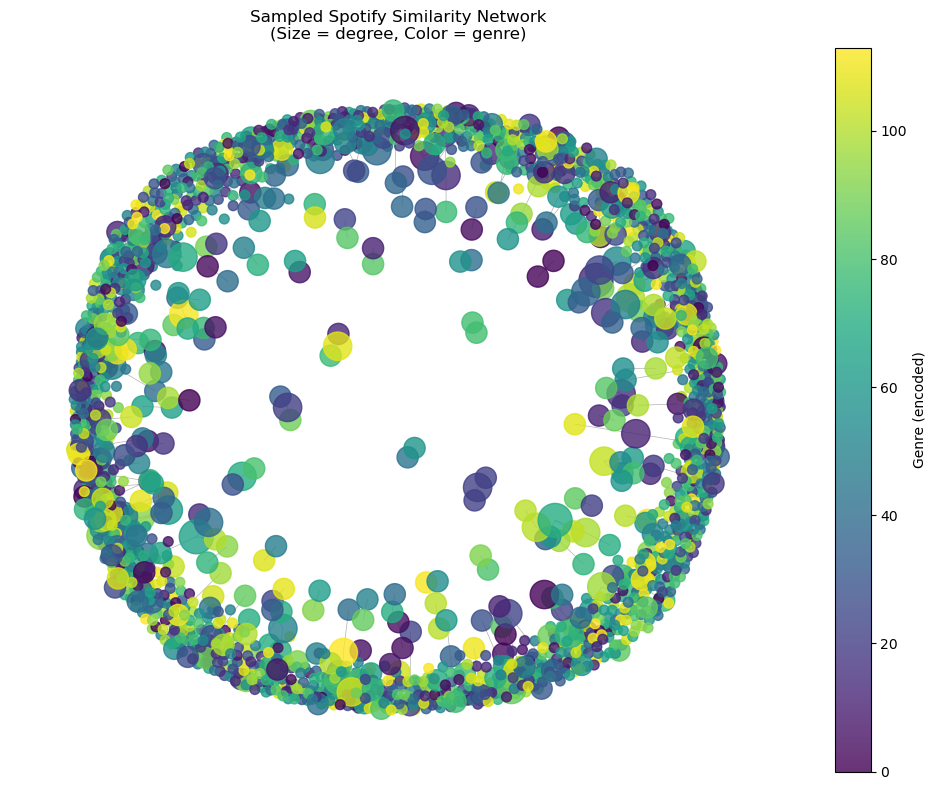

In [45]:
# 5.4 Spring layout
pos = nx.spring_layout(G_sample, k=0.1, iterations=50, seed=42)

plt.figure(figsize=(10, 8))
nodes = nx.draw_networkx_nodes(
    G_sample, pos,
    node_size=node_sizes,
    node_color=node_colors,
    cmap="viridis",
    alpha=0.8
)
nx.draw_networkx_edges(G_sample, pos, alpha=0.3, width=0.5)

plt.title("Sampled Spotify Similarity Network\n(Size = degree, Color = genre)")
plt.axis("off")
cbar = plt.colorbar(nodes)
cbar.set_label(color_label)
plt.tight_layout()
plt.show()

The figure shows a sampled subgraph of the Spotify similarity network (about 2,000 nodes) laid out with a spring layout. Each point is a track, where node size reflects degree (how many neighbours it has in the sample) and node colour encodes the genre. The circular “ring” structure is typical for a force-directed layout on a fairly homogeneous graph: most tracks have similar degree, so there is no single dominant hub pulling everything to the centre. Colours are visibly mixed around the ring rather than forming a few isolated blocks, which suggests that different genres are interwoven in the similarity space instead of forming completely separate clusters. This visualisation mainly confirms the earlier quantitative results: connectivity is quite uniform, and the network is dense enough locally to form a continuous band rather than many small disconnected islands.

# 5. ER vs BA model comparison

A comparison of the Spotify network to: an Erdős–Rényi graph G_ER(N,M) a Barabási–Albert graph G_BA(N,m) with similar average degree using degree distributions on log–log scales.

In [46]:
# Base graph: simple giant component
G_real = G_gc_simple
N = G_real.number_of_nodes()
M = G_real.number_of_edges()
avg_k_real = 2 * M / N

print(f"Real graph: N = {N}, M = {M}, <k> ≈ {avg_k_real:.3f}")

Real graph: N = 89131, M = 520223, <k> ≈ 11.673


For the model comparison, the real Spotify similarity network has **N = 89,131 nodes** and **M = 520,223 edges**, giving an average degree of  \(\langle k \rangle \approx 11.67\). These values define the baseline that the Erdős–Rényi and Barabási–Albert models should approximate: the ER graph is constructed with the same \(N\) and \(M\), and the BA model is chosen so that its expected average degree is close to 12.


In [47]:
# Erdős–Rényi G(N, M) 
rng_seed = 42
print("\n[1] Generating Erdős–Rényi G(N, M)...")
G_er = nx.gnm_random_graph(N, M, seed=rng_seed)

M_er = G_er.number_of_edges()
avg_k_er = 2 * M_er / N
print(f"ER graph: M = {M_er}, <k> ≈ {avg_k_er:.3f}")


[1] Generating Erdős–Rényi G(N, M)...
ER graph: M = 520223, <k> ≈ 11.673


In [48]:
# Barabási–Albert G_BA(N, m) 
# In BA, <k> ≈ 2m, so choose m ≈ <k_real>/2
m_ba = int(round(avg_k_real / 2))
m_ba = max(m_ba, 1)  # safety
print(f"\n[2] Generating Barabási–Albert G_BA(N={N}, m={m_ba})...")
G_ba = nx.barabasi_albert_graph(N, m_ba, seed=rng_seed)

M_ba = G_ba.number_of_edges()
avg_k_ba = 2 * M_ba / N
print(f"BA graph: M = {M_ba}, <k> ≈ {avg_k_ba:.3f}")


[2] Generating Barabási–Albert G_BA(N=89131, m=6)...
BA graph: M = 534750, <k> ≈ 11.999


In [49]:
# Degree distributions 
deg_real = np.array([d for _, d in G_real.degree()])
deg_er   = np.array([d for _, d in G_er.degree()])
deg_ba   = np.array([d for _, d in G_ba.degree()])

print("\nDegree ranges:")
print(f"  Real: min={deg_real.min()}, max={deg_real.max()}")
print(f"  ER  : min={deg_er.min()},   max={deg_er.max()}")
print(f"  BA  : min={deg_ba.min()},   max={deg_ba.max()}")

# Helper to get (k, count) arrays
def degree_hist(deg_array):
    counts = np.bincount(deg_array)
    k_vals = np.arange(len(counts))
    mask = counts > 0
    return k_vals[mask], counts[mask]

k_real, c_real = degree_hist(deg_real)
k_er,   c_er   = degree_hist(deg_er)
k_ba,   c_ba   = degree_hist(deg_ba)



Degree ranges:
  Real: min=9, max=46
  ER  : min=1,   max=29
  BA  : min=6,   max=1145


The degree ranges highlight clear differences between the real network and the
two generative models. In the Spotify graph, degrees lie in a **narrow band**
from 9 to 46, matching the k-nearest-neighbour construction where each node has
roughly the same number of neighbours. The Erdős–Rényi graph shows a slightly
broader range (1 to 29), which is consistent with a binomial/Poisson-like
degree distribution but still without extreme hubs. In contrast, the
Barabási–Albert model produces a **very broad, heavy-tailed** range from 6 up to
over 1,100, meaning a few nodes become massive hubs. This behaviour is not
present in the real Spotify network, confirming that its degree structure is
much closer to a constrained k-NN graph than to a scale-free BA network.

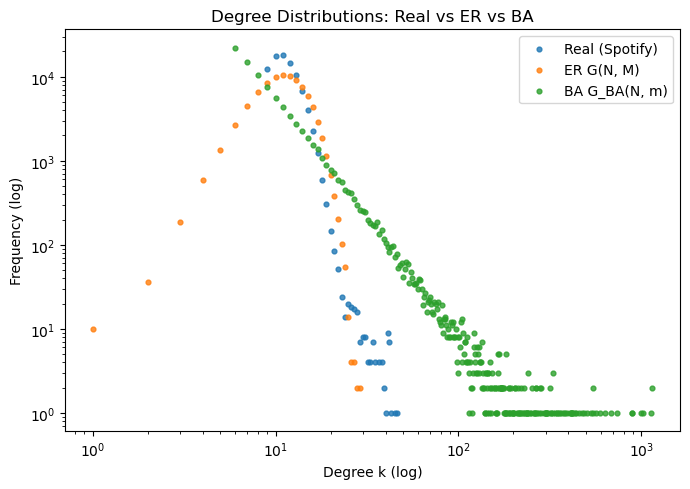

In [50]:
# Plot all three on log–log
plt.figure(figsize=(7, 5))

plt.scatter(k_real, c_real, s=12, label="Real (Spotify)", alpha=0.8)
plt.scatter(k_er,   c_er,   s=12, label="ER G(N, M)",    alpha=0.8)
plt.scatter(k_ba,   c_ba,   s=12, label="BA G_BA(N, m)", alpha=0.8)

plt.xscale("log")
plt.yscale("log")
plt.xlabel("Degree k (log)")
plt.ylabel("Frequency (log)")
plt.title("Degree Distributions: Real vs ER vs BA")
plt.legend()
plt.tight_layout()
plt.show()

The log–log degree distributions confirm that the Spotify network behaves very
differently from both the ER and BA models. The **real graph** (blue) is
concentrated in a narrow band around \(k \approx 10\text{–}15\) and drops off
quickly, which matches the constrained k-NN construction. The **Erdős–Rényi**
graph (orange) has a single peak around the same average degree but shows a
wider, more symmetric spread, as expected from a binomial/Poisson-like
distribution. The **Barabási–Albert** network (green) exhibits a clear
heavy-tailed pattern: many low-degree nodes and a few nodes with extremely high
degree, extending over several orders of magnitude. Since the Spotify network
lacks this long tail and remains tightly concentrated, it does **not** resemble
a scale-free BA network and only partially resembles the ER model. Its degree
structure is instead dominated by the imposed k-nearest-neighbour rule.


# Assortativity, hubs, and mixing patterns

In [51]:
G_mix = G_gc_simple

# Degree assortativity: do high-degree nodes connect to high-degree nodes?
deg_assort = nx.degree_assortativity_coefficient(G_mix)
print("\n[1] Degree assortativity:")
print(f"  r_degree = {deg_assort:.4f}")


[1] Degree assortativity:
  r_degree = 0.1658


The degree assortativity coefficient is **r ≈ 0.17**, which is **positive** but
not extremely large. This means the network is **mildly assortative by degree**:
high-degree nodes tend to connect slightly more often to other high-degree nodes
than to low-degree nodes, and low-degree nodes are more often linked to other
low-degree nodes. In other words, there is some tendency for “similar-degree”
tracks to cluster together, but the effect is not strong enough to create a
clear separation into a hub-only core and a leaf-only periphery. This matches
the earlier observation that degrees lie in a fairly narrow range and there are
no extreme super-hubs.


In [ ]:
# Attribute assortativity by genre 
sample_node, sample_data = next(iter(G_mix.nodes(data=True)))
has_genre = "genre" in sample_data

if has_genre:
    try:
        genre_assort = nx.attribute_assortativity_coefficient(G_mix, "genre")
        print("\n[2] Genre assortativity:")
        print(f"  r_genre = {genre_assort:.4f}")
    except Exception as e:
        print("\n[2] Genre assortativity: could not compute:", e)
        genre_assort = None
else:
    print("\n[2] Genre assortativity: 'genre' attribute not found.")
    genre_assort = None


[2] Genre assortativity:
  r_genre = 0.1132


The genre assortativity coefficient is **r ≈ 0.11**, which is also positive but
fairly small. This indicates a **weak preference for same-genre links**: tracks
are slightly more likely to be connected to other tracks of the same genre than
to tracks of different genres. However, the effect is not very strong, so the
network is far from being perfectly segregated by genre. In practice, this means
that while there are genre-based clusters, there is still a lot of cross-genre
connectivity, consistent with the visualisation where colours (genres) are mixed
around the graph instead of forming completely separate blocks.


In [53]:
# Hubs: top-degree nodes and how much they dominate
deg = dict(G_mix.degree())
deg_vals = np.array(list(deg.values()))
sorted_deg = sorted(deg.items(), key=lambda x: x[1], reverse=True)

top_k = 10
top_deg_nodes = sorted_deg[:top_k]
total_degree_sum = deg_vals.sum()
top_deg_sum = sum(d for _, d in top_deg_nodes)
share_edges_top = top_deg_sum / total_degree_sum

print("\n[3] Hubs and dominance:")
print(f"  Max degree: {deg_vals.max()}")
print(f"  Top {top_k} nodes average degree: {top_deg_sum / top_k:.2f}")
print(f"  Top {top_k} nodes share of total degree: {share_edges_top*100:.2f}%")


[3] Hubs and dominance:
  Max degree: 46
  Top 10 nodes average degree: 42.80
  Top 10 nodes share of total degree: 0.04%


The maximum degree in the network is **46**, and the top 10 nodes have an
average degree of about **42.8**, which is only modestly above the global
average of ≈11.7. Together, these 10 highest-degree nodes account for only
about **0.04% of the total degree** in the network. This is extremely small
and shows that there are **no dominant hubs** controlling a large fraction of
all connections. Instead, the network is very **egalitarian** in terms of
degree: even the “hub” nodes are only slightly more connected than the average
track, which is consistent with the k-NN construction and the narrow degree
range.


In [54]:
# small table of top-degree nodes with genre
rows = []
for n, d in top_deg_nodes:
    rows.append({
        "node": n,
        "track_id": G_mix.nodes[n].get("track_id", n),
        "genre": G_mix.nodes[n].get("genre", "Unknown"),
        "degree": d,
    })

df_top_deg = pd.DataFrame(rows)
print("\nTop-degree nodes:")
display(df_top_deg)


Top-degree nodes:


,node,track_id,genre,degree
0,88476,264ZS67Jh0vG6VG46JB7A3,rockabilly,46
1,88477,5jRqLID0I6gWwnunOBcRY7,rockabilly,45
2,88478,1Tq4dufJO0EwRQUQrIkgu5,rockabilly,43
3,86836,58UIOx8XLh8yejsuB1sBLi,psych-rock,42
4,86838,0T7nrhCiwprZ2idgYz60Pi,psych-rock,42
5,86855,4tL0U1zThI2buyH4gZZyjM,psych-rock,42
6,88465,1XhMDkExXkwO1C3oJtcEwB,rockabilly,42
7,88470,3LJF72vPczYb04NczDfAYH,rockabilly,42
8,88473,0t5sWeoRaFXUxu4xTtoTLd,rockabilly,42
9,88474,5gAuZSGGbtk1SNoJGFhRLK,rockabilly,42


In [55]:
# Path to your main CSV with metadata
DATASET_CSV_PATH = "dataset.csv"  

# Load only what we need: track_id and track_name
meta = pd.read_csv(DATASET_CSV_PATH)

# Adjust these column names if your file uses different ones
meta = meta[["track_id", "track_name"]].drop_duplicates()

print("Metadata rows:", len(meta))
display(meta.head())

# Merge track_name into the top-degree table 
df_top_deg_named = df_top_deg.merge(meta, on="track_id", how="left")

print("Top-degree nodes with names:")
display(df_top_deg_named[["track_name", "track_id", "genre", "degree"]])

Metadata rows: 89741


,track_id,track_name
0,5SuOikwiRyPMVoIQDJUgSV,Comedy
1,4qPNDBW1i3p13qLCt0Ki3A,Ghost - Acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,To Begin Again
3,6lfxq3CG4xtTiEg7opyCyx,Can't Help Falling In Love
4,5vjLSffimiIP26QG5WcN2K,Hold On


Top-degree nodes with names:


,track_name,track_id,genre,degree
0,Rockin' Around The Christmas Tree,264ZS67Jh0vG6VG46JB7A3,rockabilly,46
1,Rockin' Around The Christmas Tree,5jRqLID0I6gWwnunOBcRY7,rockabilly,45
2,Rockin' Around The Christmas Tree,1Tq4dufJO0EwRQUQrIkgu5,rockabilly,43
3,Little Saint Nick - 1991 Remix,58UIOx8XLh8yejsuB1sBLi,psych-rock,42
4,Little Saint Nick - 1991 Remix,0T7nrhCiwprZ2idgYz60Pi,psych-rock,42
5,Little Saint Nick - 1991 Remix,4tL0U1zThI2buyH4gZZyjM,psych-rock,42
6,Rockin' Around The Christmas Tree,1XhMDkExXkwO1C3oJtcEwB,rockabilly,42
7,Rockin' Around The Christmas Tree,3LJF72vPczYb04NczDfAYH,rockabilly,42
8,Rockin' Around The Christmas Tree,0t5sWeoRaFXUxu4xTtoTLd,rockabilly,42
9,Rockin' Around The Christmas Tree,5gAuZSGGbtk1SNoJGFhRLK,rockabilly,42


The top-degree nodes all correspond to different Spotify versions of essentially
the same song, *“Rockin' Around The Christmas Tree”* (including remixes and
reissues), plus a few closely related tracks from similar styles like
*“Little Saint Nick – 1991 Remix”*. Each version has its own `track_id`, but
they are all highly similar in audio features and therefore strongly connected
to each other in the k-NN graph. This creates a very dense local cluster where
all these versions act as small “micro-hubs” with degrees around 40–46. Rather
than one global hub dominating the whole network, we get a **local hub inside a
tight thematic bubble** (here, classic Christmas rock/rockabilly), which is
consistent with the overall picture of a highly clustered but degree-balanced
similarity network.


# Compute centralities + build DataFrame


In [58]:

G_cent = G_gc_simple
print(f"Graph for centrality: {G_cent.number_of_nodes()} nodes, {G_cent.number_of_edges()} edges")

# Degree & strength
deg = dict(G_cent.degree())
strength = dict(G_cent.degree(weight="weight"))

deg_vals = np.array(list(deg.values()))
str_vals = np.array(list(strength.values()))

print("\n[1] Degree / strength summary")
print(f"  Degree   min={deg_vals.min()}, max={deg_vals.max()}, mean={deg_vals.mean():.2f}")
print(f"  Strength min={str_vals.min():.3f}, max={str_vals.max():.3f}, mean={str_vals.mean():.3f}")

Graph for centrality: 89131 nodes, 520223 edges

[1] Degree / strength summary
  Degree   min=9, max=46, mean=11.67
  Strength min=2.210, max=44.527, mean=8.817


Before looking at specific centrality scores, it is useful to compare degree and
strength. The degree distribution in the centrality graph is the same as
before, ranging from **9 to 46** with a mean of **≈11.7**. When we weight edges
by their similarity scores, the node strengths range from **≈2.2 to ≈44.5**,
with an average of **≈8.8**. This means that nodes with higher degree do not
just have more neighbours, but also tend to accumulate more total similarity
weight, which is what we expect in a k-NN graph where strongly similar tracks
often appear in many neighbour lists. These values set the scale for interpreting
degree-based and eigenvector centralities in the next step.


In [59]:
# Centrality measures
print("\n[2] Computing degree centrality...")
deg_centrality = nx.degree_centrality(G_cent)

print("    Computing approximate betweenness centrality (k=200 samples)...")
bet_centrality = nx.betweenness_centrality(G_cent, k=200, normalized=True, seed=42)

print("    Computing eigenvector centrality (weighted)...")
eig_centrality = nx.eigenvector_centrality(G_cent, max_iter=500, tol=1e-6, weight="weight")

print("Centralities computed.")


[2] Computing degree centrality...
    Computing approximate betweenness centrality (k=200 samples)...
    Computing eigenvector centrality (weighted)...
Centralities computed.


In [60]:
# Build DataFrame with centralities
rows = []
for n in G_cent.nodes():
    attrs = G_cent.nodes[n]
    rows.append({
        "node": n,
        "track_id": attrs.get("track_id", n),
        "genre": attrs.get("genre", "Unknown"),
        "degree": deg[n],
        "strength": strength[n],
        "deg_centrality": deg_centrality[n],
        "betweenness": bet_centrality[n],
        "eigenvector": eig_centrality[n],
    })

df_cent = pd.DataFrame(rows)

In [61]:
# Merge track_name from the dataset
df_cent_named = df_cent.merge(meta[["track_id", "track_name"]].drop_duplicates(),
                              on="track_id", how="left")

print("\nCentrality DataFrame shape:", df_cent_named.shape)
df_cent_named.head()


Centrality DataFrame shape: (89131, 9)


,node,track_id,genre,degree,strength,deg_centrality,betweenness,eigenvector,track_name
0,0,3nqQXoyQOWXiESFLlDF1hG,dance,10,7.682940,0.000112,0.000299,3.283993e-12,Unholy (feat. Kim Petras)
1,1,2tTmW7RDtMQtBk7m2rYeSw,hip-hop,13,11.040735,0.000146,0.000027,9.110739e-12,"Quevedo: Bzrp Music Sessions, Vol. 52"
2,2,4uUG5RXrOk84mYEfFvj3cK,pop,15,13.235957,0.000168,0.000005,5.836670e-14,I'm Good (Blue)
3,3,5ww2BF9slyYgNOk37BlC4u,reggaeton,12,9.202132,0.000135,0.000057,1.188074e-08,La Bachata
4,4,6Sq7ltF9Qa7SNFBsV5Cogx,latino,11,8.396981,0.000123,0.000112,8.382746e-07,Me Porto Bonito


In [62]:
# Top 10 by eigenvector centrality
top_eig = df_cent_named.sort_values("eigenvector", ascending=False).head(10)
print("\n[1] Top 10 by eigenvector centrality (globally well-connected):")
display(top_eig[["track_name", "track_id", "genre", "degree", "strength",
                 "deg_centrality", "betweenness", "eigenvector"]])


[1] Top 10 by eigenvector centrality (globally well-connected):


,track_name,track_id,genre,degree,strength,deg_centrality,betweenness,eigenvector
88476,Rockin' Around The Christmas Tree,264ZS67Jh0vG6VG46JB7A3,rockabilly,46,44.527365,0.000516,0.000147,0.205329
88477,Rockin' Around The Christmas Tree,5jRqLID0I6gWwnunOBcRY7,rockabilly,45,43.830326,0.000505,0.000110,0.204646
88478,Rockin' Around The Christmas Tree,1Tq4dufJO0EwRQUQrIkgu5,rockabilly,43,42.445008,0.000482,0.000020,0.202984
88474,Rockin' Around The Christmas Tree,5gAuZSGGbtk1SNoJGFhRLK,rockabilly,42,41.753990,0.000471,0.000007,0.201845
88470,Rockin' Around The Christmas Tree,3LJF72vPczYb04NczDfAYH,rockabilly,42,41.753990,0.000471,0.000007,0.201845
88473,Rockin' Around The Christmas Tree,0t5sWeoRaFXUxu4xTtoTLd,rockabilly,42,41.691018,0.000471,0.000014,0.201610
88465,Rockin' Around The Christmas Tree,1XhMDkExXkwO1C3oJtcEwB,rockabilly,42,41.691018,0.000471,0.000014,0.201610
88451,Rockin' Around The Christmas Tree,5qp6vUMJGAzi7D6WjVgVqi,rockabilly,41,41.000000,0.000460,0.000000,0.200471
88481,Rockin' Around The Christmas Tree,2iqSNpmrIYXjgxSxjAYWM2,rockabilly,41,41.000000,0.000460,0.000000,0.200471
88512,Rockin' Around The Christmas Tree,1wNMaLFck9jsXipv8CQG0w,rockabilly,41,41.000000,0.000460,0.000000,0.200471


The top-10 nodes by eigenvector centrality are all different Spotify versions of
*“Rockin' Around The Christmas Tree”* in the **rockabilly** genre, with degrees
between 41 and 46 and very similar strengths. Eigenvector centrality is high
when a node is connected to other well-connected nodes, so this result means
that these versions form a **dense, mutually reinforcing cluster** at the heart
of a highly connected region of the network. Instead of one single song acting
as a global hub, we get a small group of almost equivalent “core” tracks that
all point to each other and to many similar neighbours. This matches the k-NN
construction and earlier observations: importance in this network comes from
being in the centre of a tightly knit similarity bubble (here, classic
rockabilly Christmas tracks) rather than from having an extremely high degree.

In [63]:
# Top 10 by betweenness centrality
top_bet = df_cent_named.sort_values("betweenness", ascending=False).head(10)
print("\n[2] Top 10 by betweenness centrality (bridges between regions):")
display(top_bet[["track_name", "track_id", "genre", "degree", "strength",
                 "deg_centrality", "betweenness", "eigenvector"]])


[2] Top 10 by betweenness centrality (bridges between regions):


,track_name,track_id,genre,degree,strength,deg_centrality,betweenness,eigenvector
71271,In the Dungeon,2JVTTnyOZpkra28KPIcNSV,club,9,4.349893,0.000101,0.011998,2.731079e-12
52214,Megaman 2,3An7MrOZHfQCg789ZuqXnD,comedy,10,5.394207,0.000112,0.010943,1.796411e-11
57695,Muerte del Angel,7CESNJVPLEf1aitha83n9Y,tango,10,5.273671,0.000112,0.010288,6.428084e-11
56390,Easy,4tJzmhaA3S093baGmZ8xcB,guitar,11,5.592950,0.000123,0.008887,7.721602e-12
84265,Incubus in the Night,5pNH860FWVxhNfzciJKN7w,iranian,9,2.507168,0.000101,0.008858,1.224896e-13
26747,Konbini,4N1JHcYR9TskJmqj2g5uA6,piano,9,2.358695,0.000101,0.008746,1.497930e-15
61656,"Pacific Treefrog, Winter Wren, Varied Trush, F...",1jSMoaikSjcfhgXJF9okNk,new-age,10,4.320171,0.000112,0.008725,7.277269e-16
44407,Chienne de vie,0o3c5qfqOU5b3Vrlmx7TUP,french,11,6.025659,0.000123,0.008614,1.141302e-09
38163,Slow and Subdued Brown Wave,0aSQ98crQLAOa6PYUJW9Rg,sleep,11,4.079016,0.000123,0.008598,4.012114e-14
86064,Random City Tehran P.3 - 2016 edition,7ndmFXGKHcyvxzNlkF8UEV,iranian,11,5.874541,0.000123,0.008180,2.887880e-13


The tracks with highest betweenness centrality look very different from the
eigenvector “core” songs. They have **low to moderate degree** (mostly 9–11)
but relatively large betweenness values (around 0.01), and they come from a
wide mix of genres such as *club, comedy, tango, guitar, iranian, piano,
new-age, french,* and *sleep*. Betweenness centrality is high when a node lies
on many shortest paths between other nodes, so these songs act as **bridges
between otherwise separate regions** of the similarity network. In other words,
they are not local hubs, but rather **connector tracks** that link different
genre communities together, helping to keep the graph globally navigable even
though each node only has a small number of neighbours.


# 9. k-core / core–periphery structure

- How “deep” the network is (max core index).

- How many nodes lie in low vs high cores.

- What kind of tracks live in the innermost core (the dense backbone).

In [64]:
G_core = G_gc_simple

# Compute k-core numbers for all nodes
core_num = nx.core_number(G_core)  # dict: node -> k

k_vals = np.array(list(core_num.values()))
k_min, k_max = k_vals.min(), k_vals.max()

print("\n[1] Core index summary")
print(f"  k_min  = {k_min}")
print(f"  k_max  = {k_max}")
print(f"  mean k = {k_vals.mean():.2f}")


[1] Core index summary
  k_min  = 9
  k_max  = 10
  mean k = 9.02


The k-core decomposition shows that the network is very shallow: core indices
range only from **k = 9 to k = 10**, with an average of **≈9.0**. In a k-core,
every node has at least k neighbours *within that core*. Having k_min = 9 is
consistent with the minimum degree of 9, and k_max = 10 means that even the
innermost “backbone” of the graph is only slightly denser than the rest of the
network. There is no deeply nested hierarchy of cores; instead, almost all nodes
sit in a narrow band of similar coreness, which fits our earlier observation
that the degree distribution is tightly concentrated and there are no strong
global hubs.


In [65]:
# Distribution of core sizes
unique_k, counts_k = np.unique(k_vals, return_counts=True)
print("\n[2] Core size distribution (k, #nodes):")
for k, c in zip(unique_k, counts_k):
    print(f"  k = {k:2d} : {c:6d} nodes")



[2] Core size distribution (k, #nodes):
  k =  9 :  87714 nodes
  k = 10 :   1417 nodes


The core size distribution shows that almost all nodes belong to the **9-core**
(87,714 nodes), while only a relatively small set of **1,417 nodes** forms the
**10-core**. This means that the vast majority of tracks have at least nine
neighbours inside the main bulk of the network, and a small inner group has at
least ten such neighbours among themselves. The 10-core can be seen as a
slightly denser “backbone layer” embedded inside an already well-connected
9-core, but the difference is small: there is no deep, multi-level core–shell
structure. This again fits the k-NN construction, where almost every node has a
similar number of neighbours and the network is structurally quite homogeneous.


In [66]:
# Focus on the highest core (backbone-like set)
k_star = k_max
nodes_high_core = [n for n, k in core_num.items() if k == k_star]
print(f"\n[3] Highest core:")
print(f"  k* = {k_star}")
print(f"  |C_k*| = {len(nodes_high_core)} nodes")


[3] Highest core:
  k* = 10
  |C_k*| = 1417 nodes


The highest core has **k\* = 10** and contains **1,417 nodes**. By definition,
each of these tracks has at least ten neighbours *within this inner group*, so
they form the densest region of the network in terms of mutual connectivity.
This 10-core can be interpreted as a **backbone of tightly related tracks** that
sit in the centre of the similarity space, while the remaining nodes form a
slightly looser 9-core around them. However, because k\* is only one step above
the global minimum (9), this backbone is only modestly denser than the rest of
the graph rather than a sharply separated ultra-core, which again reflects the
homogeneous k-NN construction of the network.


In [67]:
# Build small table of some nodes from the highest core
rows = []
for n in nodes_high_core[:20]:  # show first 20
    attrs = G_core.nodes[n]
    rows.append({
        "node": n,
        "track_id": attrs.get("track_id", n),
        "genre": attrs.get("genre", "Unknown"),
        "degree": G_core.degree(n)
    })

df_high_core = pd.DataFrame(rows)

In [68]:
# Merge track names 
if "meta" in globals():
    df_high_core_named = df_high_core.merge(
        meta[["track_id", "track_name"]].drop_duplicates(),
        on="track_id", how="left"
    )
    print("\nExample nodes from highest k-core (with names):")
    display(df_high_core_named[["track_name", "track_id", "genre", "degree"]])
else:
    print("\nExample nodes from highest k-core:")
    display(df_high_core)


Example nodes from highest k-core (with names):


,track_name,track_id,genre,degree
0,Left and Right (Feat. Jung Kook of BTS),0mBP9X2gPCuapvpZ7TGDk3,dance,21
1,GATÚBELA,1ga4PztXOIw1yBbdUt2X8v,reggaeton,16
2,Something in the Orange,3WMj8moIAXJhHsyLaqIIHI,country,18
3,About Damn Time,1PckUlxKqWQs3RlWXVBLw3,hip-hop,22
4,Heat Waves,02MWAaffLxlfxAUY7c5dvx,indie,19
5,First Class,1rDQ4oMwGJI7B4tovsBOxc,k-pop,11
6,Heat Waves,6CDzDgIUqeDY5g8ujExx2f,indie,11
7,X ÚLTIMA VEZ,48AJSd42lXpicsGqcgopof,reggae,14
8,Crazy What Love Can Do,1WCEAGGRD066z2Q89ObXTq,edm,11
9,Hot In It,3Z7CaxQkqbIs1rewKi6v4W,edm,12


The example tracks from the highest core (k = 10) are a mix of **recent,
mainstream songs** across many genres, including dance, reggaeton, country,
hip-hop, indie, k-pop, EDM, pop and Latin. Titles like *“Left and Right
(feat. Jung Kook of BTS)”*, *“Heat Waves”* and *“For My Hand (feat. Ed Sheeran)”*
suggest that the innermost core is populated by **popular, highly connected
tracks** that sit at the centre of dense similarity clusters. Because these
songs belong to different genres but all appear in the same 10-core, this inner
layer acts as a **cross-genre backbone**: it is made of tracks that are not
only well connected within their own style but also closely linked to songs
from other styles, helping to glue the global similarity network together.


# 10. Backbone Analysis

Number of edges with weights: 520223
Weight range: min=0.2275, max=1.0000
Mean weight: 0.7554
50th percentile: 0.7635
75th percentile: 0.8100
90th percentile: 0.8498
95th percentile: 0.8888
99th percentile: 1.0000


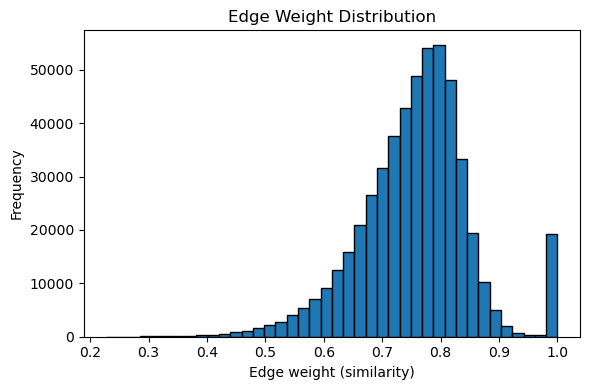

In [ ]:
# WEIGHT-BASED BACKBONE
G_w = G_gc_simple 

# Collect all edge weights
weights = [data.get("weight", 1.0) for _, _, data in G_w.edges(data=True)]
weights = np.array(weights)

print(f"Number of edges with weights: {len(weights)}")
print(f"Weight range: min={weights.min():.4f}, max={weights.max():.4f}")
print(f"Mean weight: {weights.mean():.4f}")

# Some useful percentiles
for q in [50, 75, 90, 95, 99]:
    print(f"{q}th percentile: {np.percentile(weights, q):.4f}")

# Quick histogram
plt.figure(figsize=(6,4))
plt.hist(weights, bins=40, edgecolor="black")
plt.xlabel("Edge weight (similarity)")
plt.ylabel("Frequency")
plt.title("Edge Weight Distribution")
plt.tight_layout()
plt.show()


The edge weights in the Spotify similarity network range from **0.23 to 1.00**,
with an average of **≈0.76**. The median is around **0.76**, the 75th
percentile is about **0.81**, and the top 10% of edges have weights above
**≈0.85**. Only the strongest 5% of edges exceed **≈0.89**, and the very top
1% reach a perfect similarity score of **1.0**. The histogram is clearly skewed
towards high values, meaning most edges already represent reasonably strong
similarities, with a smaller subset of very strong links that can be used as a
natural candidate for defining a backbone.


In [70]:
# WEIGHT-BASED BACKBONE
G_full = G_gc_simple

# Choose threshold around 90th percentile (~0.8498 from previous block)
BACKBONE_THRESH = 0.85
print(f"Using backbone threshold: weight >= {BACKBONE_THRESH:.3f}")

N_full = G_full.number_of_nodes()
M_full = G_full.number_of_edges()
avgk_full = 2 * M_full / N_full

print(f"\nFull graph:")
print(f"  Nodes N_full = {N_full}")
print(f"  Edges M_full = {M_full}")
print(f"  <k>_full     = {avgk_full:.2f}")

# 1) Build backbone by keeping only strong edges
G_backbone = nx.Graph()
G_backbone.add_nodes_from(G_full.nodes(data=True))

kept_edges = 0
for u, v, data in G_full.edges(data=True):
    w = data.get("weight", 1.0)
    if w >= BACKBONE_THRESH:
        G_backbone.add_edge(u, v, **data)
        kept_edges += 1

print(f"\nBackbone edges kept (before cleaning isolates): {kept_edges}")

# 2) Remove isolated nodes (nodes with degree 0 in the backbone)
isolates = list(nx.isolates(G_backbone))
G_backbone.remove_nodes_from(isolates)

N_bb = G_backbone.number_of_nodes()
M_bb = G_backbone.number_of_edges()
avgk_bb = 2 * M_bb / N_bb if N_bb > 0 else 0.0

print("\nBackbone graph (after removing isolates):")
print(f"  Nodes N_bb = {N_bb}")
print(f"  Edges M_bb = {M_bb}")
print(f"  <k>_bb     = {avgk_bb:.2f}")
print(f"  Edge fraction M_bb / M_full = {M_bb / M_full:.3%}")

# 3) Components in backbone
components_bb = list(nx.connected_components(G_backbone))
sizes_bb = sorted([len(c) for c in components_bb], reverse=True)

print("\nBackbone connectivity:")
print(f"  #components = {len(components_bb)}")
print(f"  Largest component size = {sizes_bb[0] if sizes_bb else 0}")

# Keep backbone graph for later use (e.g. community detection / visualisation)
G_backbone_085 = G_backbone

Using backbone threshold: weight >= 0.850

Full graph:
  Nodes N_full = 89131
  Edges M_full = 520223
  <k>_full     = 11.67

Backbone edges kept (before cleaning isolates): 51760

Backbone graph (after removing isolates):
  Nodes N_bb = 36395
  Edges M_bb = 51760
  <k>_bb     = 2.84
  Edge fraction M_bb / M_full = 9.950%

Backbone connectivity:
  #components = 8948
  Largest component size = 6045


Using a threshold of **weight ≥ 0.85** (roughly the top 10% of edges), the
backbone keeps the same node labels but retains only the strongest similarity
links. After removing isolated nodes, the backbone contains **36,395 nodes**
(out of 89,131) and **51,760 edges**, which is only about **9.95% of all
original edges**. The average degree drops from **≈11.67** in the full graph to
**≈2.84** in the backbone, so each remaining track is connected only to a small
set of very similar neighbours. The backbone is much more fragmented, with
**8,948 connected components**, and the largest component contains **6,045
nodes**. In other words, this backbone isolates the **strongest local clusters**
of highly similar tracks and discards weaker links that were mainly responsible
for keeping the global network in a single giant component.


# 11. Backbone Visualisation

In [71]:
G_bb = G_backbone_085
# Extract largest connected component of backbone
components_bb = list(nx.connected_components(G_bb))
giant_bb_nodes = max(components_bb, key=len)
G_bb_giant = G_bb.subgraph(giant_bb_nodes).copy()

print(f"Largest backbone component: {G_bb_giant.number_of_nodes()} nodes, "
      f"{G_bb_giant.number_of_edges()} edges")

Largest backbone component: 6045 nodes, 12727 edges


In [72]:
# Node size = degree in backbone giant component
deg_bb = dict(G_bb_giant.degree())
deg_vals_bb = np.array(list(deg_bb.values()))
min_deg_bb, max_deg_bb = deg_vals_bb.min(), deg_vals_bb.max()

min_size, max_size = 40, 500
if max_deg_bb == min_deg_bb:
    node_sizes = [300] * len(deg_bb)
else:
    node_sizes = [
        min_size + (max_size - min_size) * (d - min_deg_bb) / (max_deg_bb - min_deg_bb)
        for d in deg_bb.values()
    ]

In [73]:
# Node colour = genre if available, else degree
sample_node, sample_data = next(iter(G_bb_giant.nodes(data=True)))
has_genre = "genre" in sample_data

if has_genre:
    genres = [G_bb_giant.nodes[n].get("genre", "Unknown") for n in G_bb_giant.nodes()]
    unique_genres = {g: i for i, g in enumerate(sorted(set(genres)))}
    node_colors = [unique_genres[g] for g in genres]
    color_label = "Genre (encoded as integers)"
    print("Colouring nodes by 'genre'.")
else:
    node_colors = list(deg_bb.values())
    color_label = "Degree"
    print("No 'genre' attribute found, colouring by degree.")

Colouring nodes by 'genre'.


Computing spring layout on backbone giant component...


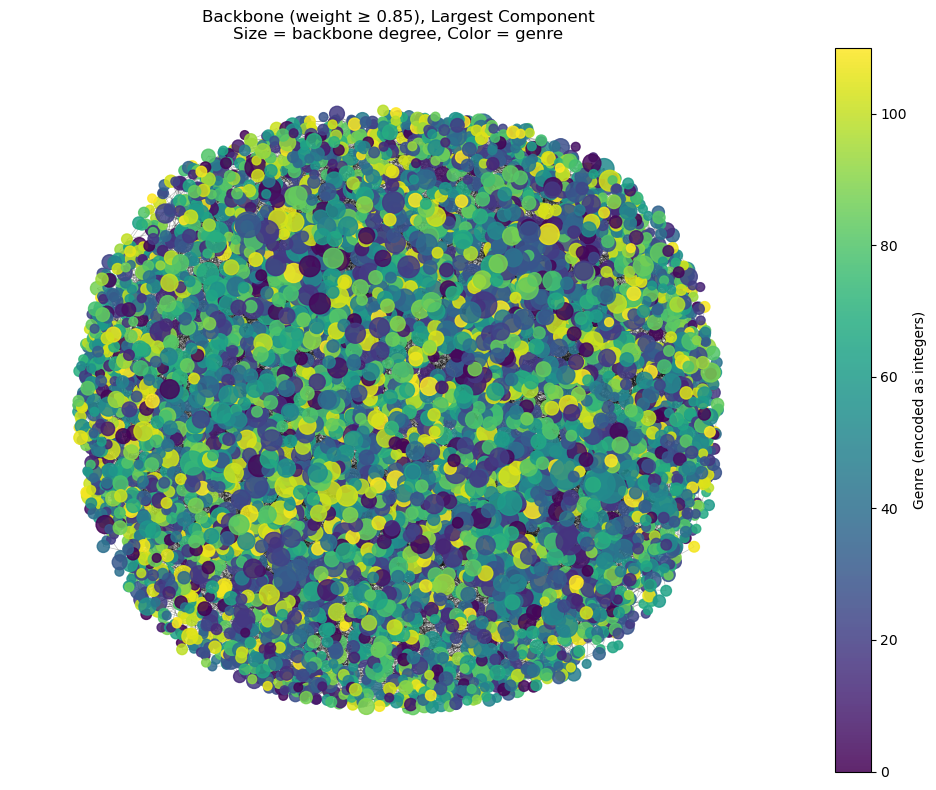

In [75]:
# Spring layout on backbone giant component
print("Computing spring layout on backbone giant component...")
pos = nx.spring_layout(G_bb_giant, k=0.2, iterations=60, seed=42)

plt.figure(figsize=(10, 8))
nodes = nx.draw_networkx_nodes(
    G_bb_giant,
    pos,
    node_size=node_sizes,
    node_color=node_colors,
    cmap="viridis",
    alpha=0.85,
)
nx.draw_networkx_edges(G_bb_giant, pos, alpha=0.25, width=0.5)

plt.title("Backbone (weight ≥ 0.85), Largest Component\n"
          "Size = backbone degree, Color = genre")
plt.axis("off")
cbar = plt.colorbar(nodes)
cbar.set_label(color_label)
plt.tight_layout()
plt.show()

### DISPARITY FILTER BACKBONE (WEIGHT-BASED)

In [79]:
Gw = G_gc_simple   # simple, undirected, weighted giant component

# --- Disparity filter (Serrano et al. 2009) ---
def disparity_backbone(Gw, alpha=0.20, mode="or"):
    """
    Undirected disparity filter backbone.
    Gw: weighted undirected graph with edge attribute 'weight'.
    alpha: significance level.
    mode: 'or' keeps edge if significant at either endpoint; 'and' requires both.
    """
    assert not Gw.is_directed()
    B = nx.Graph()
    B.add_nodes_from(Gw.nodes(data=True))

    # Degree and node strength
    deg = dict(Gw.degree())
    strength = {n: 0.0 for n in Gw.nodes()}
    for u, v, d in Gw.edges(data=True):
        w = float(d.get("weight", 1.0))
        strength[u] += w
        strength[v] += w

    def significant(p, k):
        if k <= 1:
            return True
        # Tail probability under random allocation of weights
        return (1.0 - p) ** (k - 1) < alpha

    for u, v, d in Gw.edges(data=True):
        w = float(d.get("weight", 1.0))
        pu = w / strength[u] if strength[u] > 0 else 0.0
        pv = w / strength[v] if strength[v] > 0 else 0.0
        keep_u = significant(pu, deg[u])
        keep_v = significant(pv, deg[v])
        keep = (keep_u or keep_v) if mode == "or" else (keep_u and keep_v)
        if keep:
            B.add_edge(u, v, **d)

    return B

alpha_disp = 0.35
B_disp = disparity_backbone(Gw, alpha=alpha_disp, mode="or")

edges_full = Gw.number_of_edges()
edges_disp = B_disp.number_of_edges()
frac_kept_disp = edges_disp / edges_full
components_disp = nx.number_connected_components(B_disp)

print(f"[Disp] Backbone edges: {edges_disp} / {edges_full} ({frac_kept_disp:.1%} kept)")
print(f"[Disp] Number of connected components: {components_disp}")

# Keep for later blocks
B_disp_backbone = B_disp

[Disp] Backbone edges: 42151 / 520223 (8.1% kept)
[Disp] Number of connected components: 55332


[Disp] Backbone GCC for plotting: 553 nodes, 736 edges
Computing ForceAtlas2 layout (this can take a bit)...


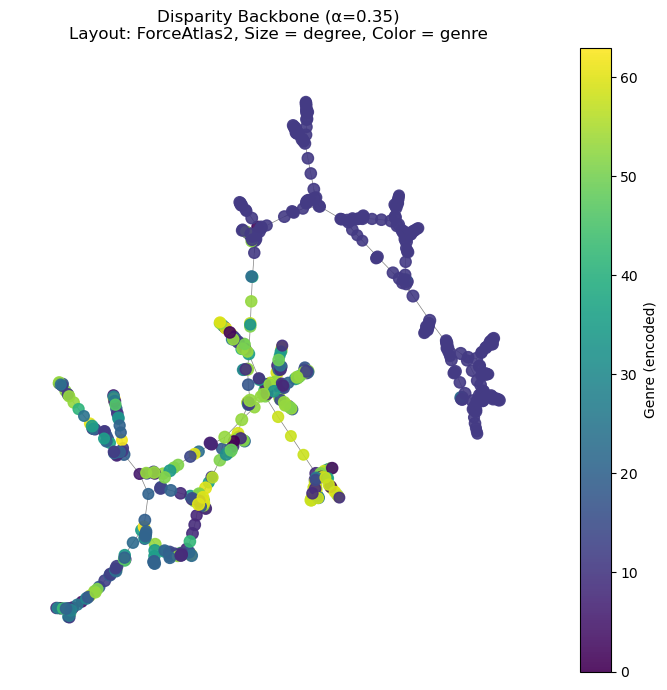

In [80]:
from fa2_modified import ForceAtlas2
H = B_disp_backbone.copy()

# Drop isolates
isolates = list(nx.isolates(H))
H.remove_nodes_from(isolates)

# Largest component for plotting
if H.number_of_nodes() > 0:
    gcc_nodes_disp = max(nx.connected_components(H), key=len)
    H_gcc = H.subgraph(gcc_nodes_disp).copy()
else:
    H_gcc = H

print(f"[Disp] Backbone GCC for plotting: {H_gcc.number_of_nodes()} nodes, "
      f"{H_gcc.number_of_edges()} edges")

# Node sizes based on original degree in G_gc_simple
degrees_full = dict(G_gc_simple.degree())
sizes_disp = 40 + 2.0 * np.array([degrees_full[n] for n in H_gcc.nodes()])

# ForceAtlas2 layout
forceatlas2 = ForceAtlas2(
    outboundAttractionDistribution=False,
    linLogMode=False,
    adjustSizes=False,
    edgeWeightInfluence=1.0,
    jitterTolerance=1.0,
    barnesHutOptimize=True,
    barnesHutTheta=1.2,
    scalingRatio=2.0,
    strongGravityMode=False,
    gravity=1.0,
    verbose=False,
)

print("Computing ForceAtlas2 layout (this can take a bit)...")
pos_disp = forceatlas2.forceatlas2_networkx_layout(
    H_gcc,
    pos=None,
    iterations=1000
)

# Colour by genre if available, else degree
sample_node, sample_data = next(iter(H_gcc.nodes(data=True)))
has_genre = "genre" in sample_data

if has_genre:
    genres = [H_gcc.nodes[n].get("genre", "Unknown") for n in H_gcc.nodes()]
    unique_genres = {g: i for i, g in enumerate(sorted(set(genres)))}
    node_colors = [unique_genres[g] for g in genres]
    color_label = "Genre (encoded)"
else:
    node_colors = [degrees_full[n] for n in H_gcc.nodes()]
    color_label = "Degree"

fig, ax = plt.subplots(figsize=(7, 7))
nx.draw_networkx_edges(H_gcc, pos_disp, width=0.5, alpha=0.5, ax=ax)
nodes = nx.draw_networkx_nodes(
    H_gcc,
    pos_disp,
    node_size=sizes_disp,
    node_color=node_colors,
    cmap="viridis",
    alpha=0.9,
    ax=ax,
)

ax.set_title(
    f"Disparity Backbone (α={alpha_disp})\n"
    "Layout: ForceAtlas2, Size = degree, Color = genre",
    fontsize=12
)
ax.set_axis_off()
cbar = plt.colorbar(nodes, ax=ax)
cbar.set_label(color_label)
plt.tight_layout()
plt.show()


The disparity backbone with **α = 0.35** keeps only the most statistically
significant similarity edges, leaving a giant component of **553 nodes and
736 edges**. The ForceAtlas2 layout reveals a clear **tree-like skeleton** with
several long branches rather than a dense cloud. Node size encodes degree in
the original graph, and node colour encodes the genre. Along each branch,
colours tend to be locally coherent but change gradually, which suggests that
the backbone is following **high-confidence similarity paths** through related
subgenres, while still connecting different styles along the same chain. In
contrast to the full network where everything collapsed into a single blob, this
backbone visualisation highlights the **main corridors of strong similarity**
and makes it easier to see how genre-specific regions are linked together.


# GENRE-BASED MODULARITY ON FULL NETWORK
- detect communities on the backbone giant component

- compute modularity and community sizes

- look at genre composition of the biggest communities

In [81]:
G_full = G_gc_simple
print(f"Full graph: {G_full.number_of_nodes()} nodes, {G_full.number_of_edges()} edges")

# --- modularity helper (eq. 9.12 from Network Science) ---
def calculate_modularity(G, communities_dict):
    """
    G: undirected graph
    communities_dict: node -> community_label (string or int)
    Unweighted modularity as in Barabási, Chapter 9.
    """
    L = G.number_of_edges()
    if L == 0:
        raise ValueError("Graph has no edges")

    M = 0.0
    # group nodes by community
    comm_nodes = {}
    for node, c in communities_dict.items():
        comm_nodes.setdefault(c, set()).add(node)

    for c, nodes in comm_nodes.items():
        sub = G.subgraph(nodes)
        L_c = sub.number_of_edges()                   # internal edges
        k_c = sum(dict(G.degree(nodes)).values())     # sum of degrees
        M += (L_c / L) - (k_c / (2 * L)) ** 2

    return M

# --- build genre-based partition: node -> genre label ---
genre_partition = {}
for n, data in G_full.nodes(data=True):
    genre_partition[n] = data.get("genre", "unknown")

Q_genre_full = calculate_modularity(G_full, genre_partition)
print(f"Genre-based modularity on full graph: Q_genre = {Q_genre_full:.4f}")


Full graph: 89131 nodes, 520223 edges
Genre-based modularity on full graph: Q_genre = 0.1122


Using the genres attached to each track as a partition, the full Spotify
similarity network has a **genre-based modularity of \(Q \approx 0.11\)**. This
is only slightly above zero, which means that genres explain some structure but
do **not** produce very sharply separated communities. In other words, tracks of
the same genre are somewhat more connected to each other than to other genres,
but the effect is weak: many edges still run across genre boundaries. This fits
our earlier observations that the degree distribution is narrow and genres mix
heavily in both the sampled and backbone visualisations.


### LOUVAIN COMMUNITIES ON FULL NETWORK

In [82]:
G_full = G_gc_simple
print(f"Full graph: {G_full.number_of_nodes()} nodes, {G_full.number_of_edges()} edges")

# Reuse calculate_modularity from previous cell

print("\n[1] Running Louvain community detection (unweighted)...")
louvain_comms = nx.community.louvain_communities(G_full, seed=42)
num_comms = len(louvain_comms)
print(f"  Detected {num_comms} communities.")

# Build node -> community mapping
louvain_map = {}
for i, comm in enumerate(louvain_comms):
    for node in comm:
        louvain_map[node] = i

# Compute modularity for Louvain partition using the same helper
Q_louvain_full = calculate_modularity(G_full, louvain_map)
print(f"\n[2] Louvain modularity on full graph: Q_louvain = {Q_louvain_full:.4f}")

# Community size summary
sizes = [(i, len(c)) for i, c in enumerate(louvain_comms)]
sizes_sorted = sorted(sizes, key=lambda x: x[1], reverse=True)

print("\n[3] Largest communities (id, size):")
for cid, size in sizes_sorted[:10]:
    print(f"  Community {cid}: {size} nodes")

Full graph: 89131 nodes, 520223 edges

[1] Running Louvain community detection (unweighted)...
  Detected 34 communities.

[2] Louvain modularity on full graph: Q_louvain = 0.8533

[3] Largest communities (id, size):
  Community 24: 5227 nodes
  Community 9: 5175 nodes
  Community 20: 4163 nodes
  Community 26: 4115 nodes
  Community 11: 3683 nodes
  Community 21: 3630 nodes
  Community 8: 3614 nodes
  Community 16: 3588 nodes
  Community 5: 3586 nodes
  Community 13: 3541 nodes


Running the Louvain algorithm on the full Spotify similarity network yields
**34 communities** with a modularity of **\(Q_{\text{Louvain}} \approx 0.85\)**.
This is extremely high and much larger than the **genre-based modularity
\(Q_{\text{genre}} \approx 0.11\)**. In modularity terms, this means the Louvain
partition captures a very strong community structure: nodes are grouped into
clusters that have far more internal edges than would be expected by chance,
given the degree sequence.

The largest communities each contain around **3,500–5,000 tracks** (e.g.
Community 24 with 5,227 nodes, Community 9 with 5,175 nodes, etc.), indicating
that the network splits into several sizeable “modules” rather than just a few
tiny groups plus one giant cluster. The fact that \(Q_{\text{Louvain}}\) is so
much higher than \(Q_{\text{genre}}\) suggests that **genre alone does not
explain the main community structure**. Instead, the Louvain communities likely
capture a mix of factors such as subgenres, production style, era, and acoustic
similarity, producing clusters that are much more cohesive than simple genre
labels would predict.


###  CONFUSION MATRIX – GENRES vs LOUVAIN COMMUNITIES

In [83]:
import seaborn as sns
from collections import Counter

In [84]:
G = G_full 

# Collect all genres from node attributes
all_genres = []
for _, data in G.nodes(data=True):
    g = data.get("genre", "unknown")
    if g is None or g == "":
        g = "unknown"
    all_genres.append(g)

genre_counts = Counter(all_genres)

In [85]:
# Pick top K genres
TOP_K_GENRES = 7
top_genres = [g for g, _ in genre_counts.most_common(TOP_K_GENRES)]
print("Top genres:", top_genres)

Top genres: ['tango', 'study', 'comedy', 'grindcore', 'salsa', 'children', 'bluegrass']


In [86]:
# Top K communities by size
comm_sizes = [(cid, len(nodes)) for cid, nodes in enumerate(louvain_comms)]
comm_sizes.sort(key=lambda x: x[1], reverse=True)

TOP_K_COMMS = 7
top_comm_ids = [cid for cid, _ in comm_sizes[:TOP_K_COMMS]]
print("Top communities:", top_comm_ids)


Top communities: [24, 9, 20, 26, 11, 21, 8]


In [87]:
# Confusion matrix D[genre, community]
D = pd.DataFrame(0, index=top_genres, columns=top_comm_ids)

for n, data in G.nodes(data=True):
    g = data.get("genre", "unknown")
    if g is None or g == "":
        g = "unknown"
    if g not in top_genres:
        continue

    comm = louvain_map.get(n, None)
    if comm not in top_comm_ids:
        continue

    D.loc[g, comm] += 1

print("\nConfusion matrix D (Top genres × Top communities):")
print(D)


Confusion matrix D (Top genres × Top communities):
            24   9   20  26  11   21  8 
tango      113    0  90   0   0    0  22
study      590  158   1   0   1   45  40
comedy       0    1  17  10   0    0  42
grindcore    2   12  28   6  25  599   3
salsa        5    3  39  19  14    1  14
children    47    7  19  38  15    0  45
bluegrass   76   19  76  22   6    1   1


To compare genres with the communities found by Louvain, we built a confusion
matrix between the **top 7 genres** (`tango`, `study`, `comedy`, `grindcore`,
`salsa`, `children`, `bluegrass`) and the **7 largest communities**
(IDs 24, 9, 20, 26, 11, 21, 8). The counts show a clear pattern of partial
alignment:

- **Study** is strongly concentrated in **Community 24** (590 tracks), with a
  secondary presence in Community 9 (158 tracks). This suggests that at least
  one large community is dominated by “study”–type tracks, forming a coherent
  functional cluster.
- **Grindcore** is heavily focused in **Community 21** (599 tracks), with only
  smaller spillover into other communities. This indicates a tightly knit
  subscene that the Louvain algorithm isolates very clearly.
- **Tango** appears mostly in **Communities 24 and 20** (113 and 90 tracks),
  while **bluegrass** is split primarily between **Communities 24 and 20**
  as well (76 and 76 tracks). This suggests that some communities mix multiple
  acoustic/folk-oriented genres rather than being purely genre-homogeneous.
- **Comedy**, **salsa**, and **children** are more evenly spread, with comedy
  especially concentrated in **Community 8** (42 tracks) and to a lesser extent
  Community 20, while children’s music has sizable blocks in **Communities 24,
  26 and 8**. These genres do not map cleanly to a single community, indicating
  cross-genre or cross-functional overlap in the similarity structure.

Overall, the confusion matrix shows that **some Louvain communities correspond
quite well to specific genres** (e.g. study, grindcore), while others mix
several genres (e.g. tango, bluegrass, children) inside the same structural
module. This confirms that genre provides only a **partial explanation** of the
community structure: the main clusters in the similarity network reflect a
combination of genre, function (study/children/comedy), and shared acoustic
properties rather than a simple one-to-one mapping from genre labels to
communities.


In [88]:
# Row-wise normalised matrix
D_normalized = D.div(D.sum(axis=1).replace(0, np.nan), axis=0)
print("\nRow-normalised confusion matrix (genre-wise proportions):")
print(D_normalized)


Row-normalised confusion matrix (genre-wise proportions):
                 24        9         20        26        11        21  \
tango      0.502222  0.000000  0.400000  0.000000  0.000000  0.000000   
study      0.706587  0.189222  0.001198  0.000000  0.001198  0.053892   
comedy     0.000000  0.014286  0.242857  0.142857  0.000000  0.000000   
grindcore  0.002963  0.017778  0.041481  0.008889  0.037037  0.887407   
salsa      0.052632  0.031579  0.410526  0.200000  0.147368  0.010526   
children   0.274854  0.040936  0.111111  0.222222  0.087719  0.000000   
bluegrass  0.378109  0.094527  0.378109  0.109453  0.029851  0.004975   

                 8   
tango      0.097778  
study      0.047904  
comedy     0.600000  
grindcore  0.004444  
salsa      0.147368  
children   0.263158  
bluegrass  0.004975  


Looking at the row-normalised confusion matrix (genre-wise proportions) makes
the alignment between genres and communities even clearer. For **study**, about
**71%** of tracks fall into **Community 24**, with another ~19% in Community 9,
so this genre is strongly concentrated in just one or two structural modules.
**Grindcore** is even more focused: nearly **89%** of grindcore tracks belong
to **Community 21**, which indicates a very tight, well-isolated subscene.

In contrast, **tango** is split mainly between **Communities 24 and 20**
(roughly 50% and 40%), and **bluegrass** shows a very similar pattern, also
divided between Communities 24 and 20 (about 38% each). **Comedy** is dominated
by **Community 8** (around 60%), while **children’s music** has a more diffuse
structure, with notable shares in **Communities 24, 26, and 8** (about 27%,
22%, and 26%, respectively). **Salsa** is spread across several communities,
with its largest share in **Community 20** (~41%) but substantial fractions in
Communities 26, 11 and 24 as well. Overall, some genres (study, grindcore,
comedy) map quite cleanly onto single communities, whereas others (tango,
bluegrass, salsa, children) are distributed across multiple modules, reinforcing
the idea that Louvain communities capture more than just genre boundaries.


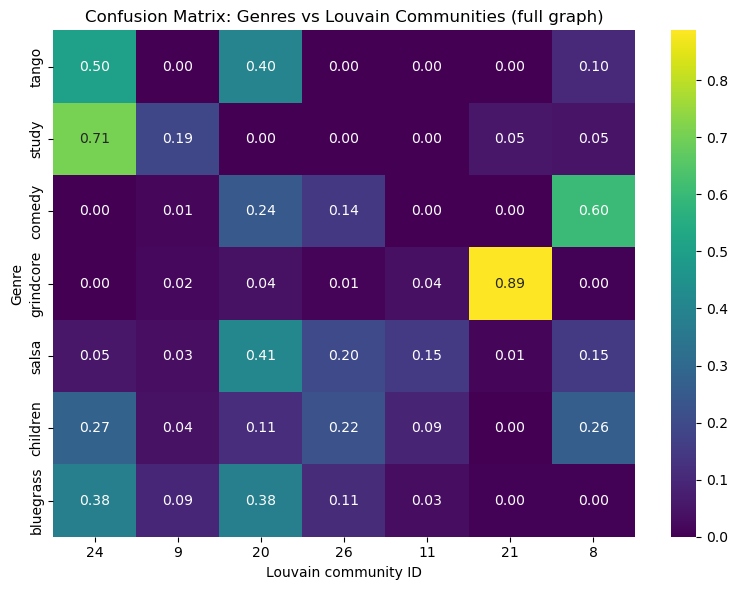

In [89]:
# Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(D_normalized, annot=True, cmap="viridis", fmt=".2f")
plt.xlabel("Louvain community ID")
plt.ylabel("Genre")
plt.title("Confusion Matrix: Genres vs Louvain Communities (full graph)")
plt.tight_layout()
plt.show()

The confusion matrix heatmap shows how the top genres align with the largest
Louvain communities. Some genres are strongly concentrated: **study** tracks
are mainly in Community 24 (≈0.71) with a smaller group in Community 9, and
**grindcore** is overwhelmingly in Community 21 (≈0.89), indicating very tight,
genre–specific modules. **Comedy** is dominated by Community 8 (≈0.60), while
**tango** and **bluegrass** split primarily between Communities 24 and 20, each
showing two main peaks rather than one. **Salsa** and **children** are more
evenly spread across several communities, suggesting that these genres sit at
the interface of multiple structural clusters. Overall, some communities line
up closely with a single genre (study, grindcore, comedy), whereas others mix
several genres, confirming that the Louvain communities capture structure that
goes beyond simple genre labels.


### Visualisation

Visualisation subgraph: 8000 nodes, 4096 edges
Computing ForceAtlas2 layout on sampled subgraph...


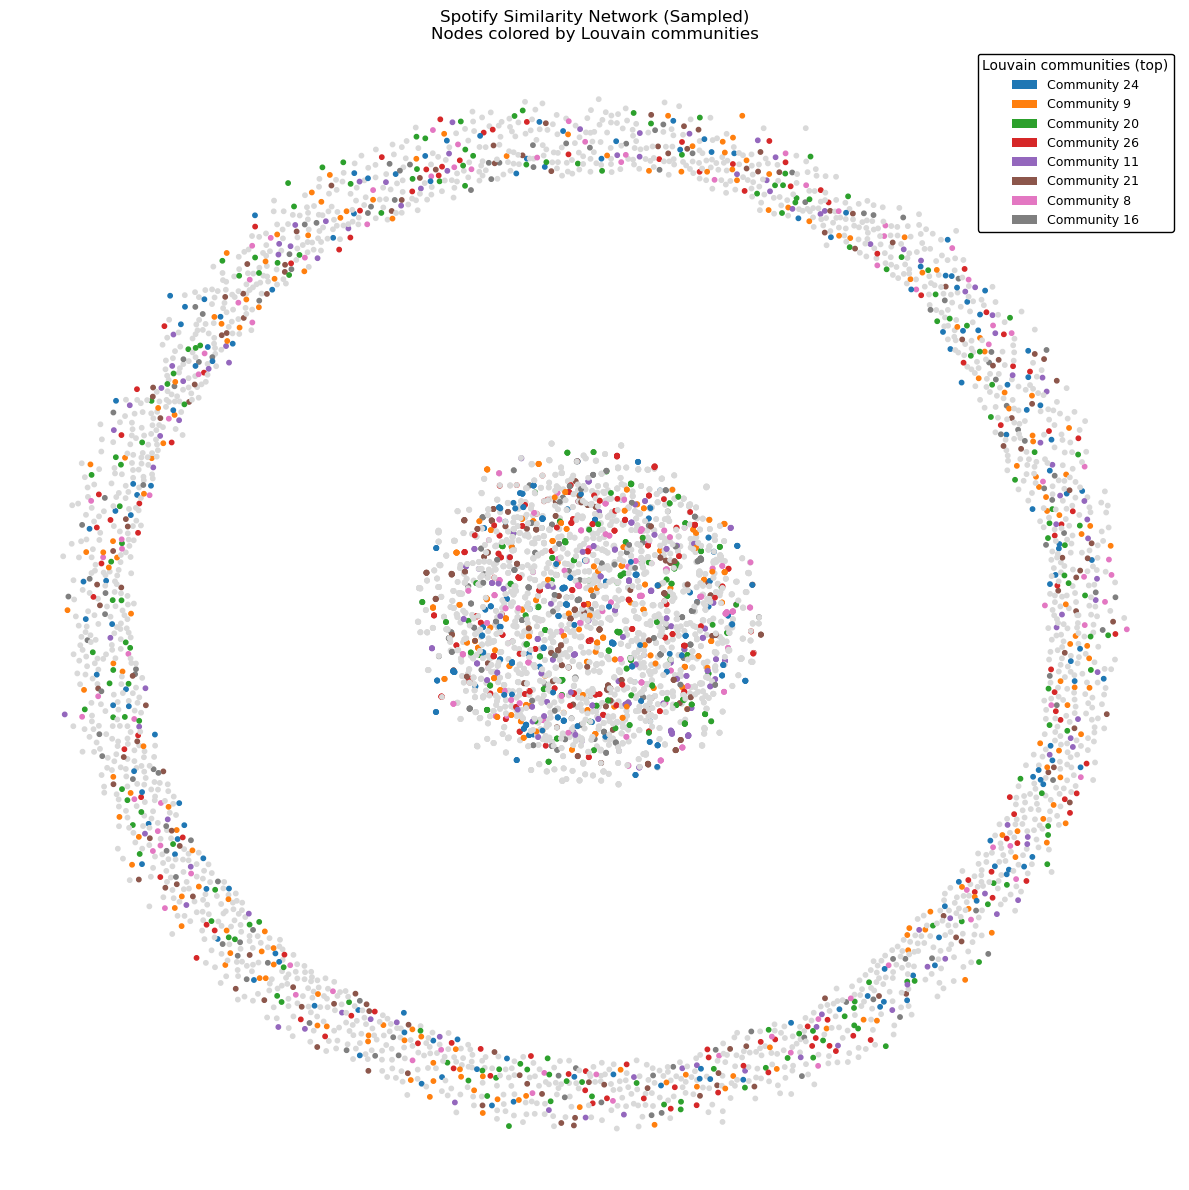

In [92]:
from matplotlib.patches import Patch   
G = G_gc_simple  # full simple graph

# --- sampling for visualisation ---
np.random.seed(42)
TARGET_SAMPLE_SIZE = 8000  # adjust if too slow / too cluttered
sample_size = min(TARGET_SAMPLE_SIZE, G.number_of_nodes())

sample_nodes = np.random.choice(list(G.nodes()), size=sample_size, replace=False)
G_vis = G.subgraph(sample_nodes).copy()

print(f"Visualisation subgraph: {G_vis.number_of_nodes()} nodes, {G_vis.number_of_edges()} edges")

# --- ForceAtlas2 layout on sampled graph ---
forceatlas2 = ForceAtlas2(
    outboundAttractionDistribution=True,
    linLogMode=False,
    adjustSizes=False,
    edgeWeightInfluence=1.0,
    jitterTolerance=1.0,
    barnesHutOptimize=True,
    barnesHutTheta=1.2,
    scalingRatio=10.0,
    gravity=1.0,
    verbose=False,
)

print("Computing ForceAtlas2 layout on sampled subgraph...")
pos = forceatlas2.forceatlas2_networkx_layout(G_vis, pos=None, iterations=500)

# --- choose top communities for colouring ---
comm_sizes = sorted(
    ((cid, len(nodes)) for cid, nodes in enumerate(louvain_comms)),
    key=lambda x: x[1],
    reverse=True,
)
top_n = 8
top_comm_ids = [cid for cid, _ in comm_sizes[:top_n]]

palette = sns.color_palette("tab10", n_colors=len(top_comm_ids))
community_palette = {comm: palette[i] for i, comm in enumerate(top_comm_ids)}
default_color = (0.85, 0.85, 0.85)  # light grey for small communities

# Map each sampled node to a color based on its Louvain community
node_colors = [
    community_palette.get(louvain_map.get(node, -1), default_color)
    for node in G_vis.nodes()
]

plt.figure(figsize=(12, 12))
nx.draw_networkx_edges(G_vis, pos, alpha=0.03, width=0.3, edge_color="gray")
nx.draw_networkx_nodes(G_vis, pos, node_size=10, node_color=node_colors)

# Legend for top communities
legend_handles = [
    Patch(
        facecolor=community_palette[comm],
        edgecolor="none",
        label=f"Community {comm}",
    )
    for comm in top_comm_ids
]

plt.legend(
    handles=legend_handles,
    loc="upper right",
    frameon=True,
    fancybox=True,
    framealpha=1.0,
    edgecolor="black",
    fontsize=9,
    title="Louvain communities (top)",
)

plt.title("Spotify Similarity Network (Sampled)\nNodes colored by Louvain communities")
plt.axis("off")
plt.tight_layout()
plt.show()


The sampled ForceAtlas2 layout shows the Spotify similarity network as a dense
core surrounded by a large outer ring of tracks. Nodes are coloured by the
largest Louvain communities, while smaller communities appear in light grey.
Even though modularity is very high, the plot does not break into a few isolated
colour “islands”. Instead, different community colours are **interleaved** both
in the centre and along the ring. This suggests that communities are not
geographically separated in a simple way: each structural module is embedded in
a continuous similarity space where communities touch and overlap, rather than
being disconnected clusters. The layout is therefore useful more as a global
“map” of the network’s density and shape (core + ring) than as a clean visual
segmentation of communities.

# How often do songs connect to same-genre neighbours?

In [ ]:

G = G_gc_simple  # full undirected, simple graph

# Get a clean genre label for every node
genres = {}
for n, data in G.nodes(data=True):
    g = data.get("genre", "unknown")
    if g is None or g == "":
        g = "unknown"
    genres[n] = g

# Edge-level: same-genre vs cross-genre
same_edges = 0
total_edges = G.number_of_edges()

for u, v in G.edges():
    if genres[u] == genres[v]:
        same_edges += 1

frac_same_edges = same_edges / total_edges
print("\n[1] Edge-level alignment:")
print(f"  Same-genre edges: {same_edges} / {total_edges} "
      f"({frac_same_edges:.3f} of all edges)")

# Node-level: for each node, fraction of neighbours with same genre
rows = []
for n in G.nodes():
    nbrs = list(G.neighbors(n))
    k = len(nbrs)
    if k == 0:
        frac_same = np.nan
    else:
        same = sum(1 for m in nbrs if genres[m] == genres[n])
        frac_same = same / k
    rows.append({"node": n, "genre": genres[n], "deg": k, "frac_same": frac_same})

df_align = pd.DataFrame(rows)

print("\n[2] Node-level alignment (all nodes):")
print(f"  Mean fraction of same-genre neighbours:   {df_align['frac_same'].mean():.3f}")
print(f"  Median fraction of same-genre neighbours: {df_align['frac_same'].median():.3f}")

# Per-genre summary (only genres with enough nodes to be meaningful)
MIN_NODES_PER_GENRE = 50

genre_stats = (
    df_align
    .groupby("genre")
    .agg(
        n_nodes=("node", "count"),
        mean_deg=("deg", "mean"),
        mean_frac_same=("frac_same", "mean"),
        median_frac_same=("frac_same", "median"),
    )
    .query("n_nodes >= @MIN_NODES_PER_GENRE")
    .sort_values("mean_frac_same", ascending=False)
)

print(f"\n[3] Per-genre alignment (genres with at least {MIN_NODES_PER_GENRE} tracks):")
print("  Top 10 by mean_frac_same:")
display(genre_stats.head(10))

print("\n  Bottom 10 by mean_frac_same:")
display(genre_stats.tail(10))



[1] Edge-level alignment:
  Same-genre edges: 63146 / 520223 (0.121 of all edges)

[2] Node-level alignment (all nodes):
  Mean fraction of same-genre neighbours:   0.116
  Median fraction of same-genre neighbours: 0.000

[3] Per-genre alignment (genres with at least 50 tracks):
  Top 10 by mean_frac_same:


,n_nodes,mean_deg,mean_frac_same,median_frac_same
genre,,,,
comedy,991,11.956609,0.757882,1.000000
sleep,860,11.788372,0.501095,0.555556
jazz,776,13.541237,0.385916,0.269697
study,997,11.735206,0.348085,0.333333
grindcore,991,11.687185,0.278214,0.250000
drum-and-bass,931,11.757250,0.277014,0.222222
soul,832,12.536058,0.232655,0.100000
dance,651,12.433180,0.228832,0.111111
pagode,791,11.840708,0.215823,0.133333



  Bottom 10 by mean_frac_same:


,n_nodes,mean_deg,mean_frac_same,median_frac_same
genre,,,,
malay,985,11.643655,0.033161,0.0
turkish,902,11.545455,0.031486,0.0
folk,624,11.466346,0.029872,0.0
goth,877,11.376283,0.026714,0.0
garage,865,11.369942,0.026024,0.0
brazil,514,11.595331,0.025906,0.0
blues,534,11.516854,0.025302,0.0
hard-rock,572,11.479021,0.024535,0.0
j-rock,611,11.487725,0.023757,0.0


To quantify how strongly songs connect to others of the same genre, we measured
genre alignment at both edge and node level. Only **≈12.1% of all edges**
(63,146 out of 520,223) connect two tracks with exactly the same genre label.
Consistently, the **average track** has only about **11.6% of its neighbours
from the same genre**, and the **median is 0**, meaning that more than half of
all tracks have *no* same-genre neighbours at all. In other words, the
similarity graph is strongly **cross-genre**: most edges connect tracks with
different genre tags.

However, this effect is not uniform across genres. Some genres form very
coherent pockets: for example, **comedy** tracks have on average **≈76%** of
their neighbours in the same genre, and **sleep**, **jazz**, and **study**
tracks also have relatively high within-genre alignment (around 35–50%). These
categories behave like well-defined “islands” in the similarity space. At the
opposite extreme, genres such as **electronic**, **j-rock**, **hard-rock**,
**blues**, **brazil**, **garage**, **goth**, **folk**, **turkish**, and
**malay** have mean same-genre fractions around **2–3%**, with a median of
zero. For these genres, neighbours are almost always from *other* genres, which
suggests that either the genre labels are broad and heterogeneous, or that the
audio features emphasise cross-genre similarities (e.g. shared tempo or
production style) more than the high-level genre tags. Overall, the network is
far from genre-segregated; genre matters for a few very specific categories,
but most tracks live in densely mixed, multi-genre neighbourhoods.


### RANDOM BASELINE (GENRE SHUFFLE)

- Randomly permute genre labels across nodes several times

- Each time, recompute the fraction of same-genre edges

- Compare the observed value (≈0.121) to the random mean + std

In [94]:
G = G_gc_simple

# Reuse the original genres dict from Block 13.1
# If it's gone, rebuild it:
if "genres" not in globals():
    genres = {}
    for n, data in G.nodes(data=True):
        g = data.get("genre", "unknown")
        if g is None or g == "":
            g = "unknown"
        genres[n] = g

# Observed same-genre edge fraction (for reference)
same_obs = 0
M = G.number_of_edges()
for u, v in G.edges():
    if genres[u] == genres[v]:
        same_obs += 1
frac_same_obs = same_obs / M
print(f"\nObserved fraction of same-genre edges: {frac_same_obs:.3f}")

# Prepare arrays for fast shuffling
nodes = list(G.nodes())
node_index = {n: i for i, n in enumerate(nodes)}
genre_arr = np.array([genres[n] for n in nodes])

# Edge endpoints as index arrays
src_idx = []
dst_idx = []
for u, v in G.edges():
    src_idx.append(node_index[u])
    dst_idx.append(node_index[v])
src_idx = np.array(src_idx, dtype=np.int32)
dst_idx = np.array(dst_idx, dtype=np.int32)

# Monte Carlo over shuffled labels
NUM_SHUFFLES = 20  # increase if you want a smoother estimate

frac_same_rand = []

rng = np.random.default_rng(42)
for it in range(NUM_SHUFFLES):
    # Permute genre labels across nodes
    shuffled = genre_arr.copy()
    rng.shuffle(shuffled)
    
    # Compare genres on each edge
    same_rand = np.sum(shuffled[src_idx] == shuffled[dst_idx])
    frac = same_rand / M
    frac_same_rand.append(frac)
    print(f"  Shuffle {it+1:2d}: frac_same = {frac:.3f}")

frac_same_rand = np.array(frac_same_rand)
mean_rand = frac_same_rand.mean()
std_rand = frac_same_rand.std(ddof=1)

print("\n[Random baseline over shuffles]")
print(f"  Mean fraction of same-genre edges (random): {mean_rand:.3f}")
print(f"  Std  fraction of same-genre edges (random): {std_rand:.3f}")
print(f"\n  Observed / random mean = {frac_same_obs / mean_rand:.2f}x")
print(f"  Difference in standard deviations: "
      f"{(frac_same_obs - mean_rand) / std_rand:.2f} σ")



Observed fraction of same-genre edges: 0.121
  Shuffle  1: frac_same = 0.009
  Shuffle  2: frac_same = 0.009
  Shuffle  3: frac_same = 0.009
  Shuffle  4: frac_same = 0.009
  Shuffle  5: frac_same = 0.009
  Shuffle  6: frac_same = 0.009
  Shuffle  7: frac_same = 0.009
  Shuffle  8: frac_same = 0.009
  Shuffle  9: frac_same = 0.009
  Shuffle 10: frac_same = 0.009
  Shuffle 11: frac_same = 0.009
  Shuffle 12: frac_same = 0.009
  Shuffle 13: frac_same = 0.009
  Shuffle 14: frac_same = 0.009
  Shuffle 15: frac_same = 0.009
  Shuffle 16: frac_same = 0.009
  Shuffle 17: frac_same = 0.009
  Shuffle 18: frac_same = 0.009
  Shuffle 19: frac_same = 0.009
  Shuffle 20: frac_same = 0.009

[Random baseline over shuffles]
  Mean fraction of same-genre edges (random): 0.009
  Std  fraction of same-genre edges (random): 0.000

  Observed / random mean = 13.14x
  Difference in standard deviations: 1196.36 σ


To understand whether the observed genre alignment is meaningful or just a
by-product of the overall genre frequencies, we compared it to a random
baseline. We kept the network fixed but **shuffled the genre labels** across
nodes 20 times and recomputed the fraction of same-genre edges each time. In
this randomised world, only about **0.9% of edges** connect two tracks with the
same genre (\(\approx 0.009\) on average), and the value is practically
constant across shuffles.

In the real network, however, we observe **12.1% same-genre edges**, which is
about **13× higher than the random baseline**. This shows that the k-NN
similarity graph is **far from genre-agnostic**: tracks are much more likely to
be connected to same-genre neighbours than we would expect by chance. At the
same time, 12.1% is still a relatively small share of all edges, meaning that
the network remains strongly **cross-genre** despite this statistically strong
signal. In other words, genre clearly influences who connects to whom, but most
of the similarity structure is driven by finer-grained audio properties and
cross-genre relationships.

# 14. 

# Load track dataset & detect feature columns

In [96]:
DATASET_CSV_PATH = "dataset.csv"   # adjust if needed

df_tracks = pd.read_csv(DATASET_CSV_PATH)
print(f"Loaded track dataset: {df_tracks.shape[0]} rows, {df_tracks.shape[1]} columns\n")

print("Columns:")
print(df_tracks.columns.tolist())

# --- 1) Manually set genre + track ID columns ---
genre_col = "track_genre"
track_id_col = "track_id"

print(f"\nUsing genre column:      '{genre_col}'")
print(f"Using track ID column:   '{track_id_col}'")

# --- 2) Pick audio feature columns explicitly (Spotify-style) ---
audio_feature_cols = [
    "danceability",
    "energy",
    "speechiness",
    "acousticness",
    "instrumentalness",
    "liveness",
    "valence",
    "tempo",
]

# sanity check: keep only those that actually exist
audio_feature_cols = [c for c in audio_feature_cols if c in df_tracks.columns]

print("\nAudio feature columns to use:")
print(audio_feature_cols)

# --- 3) Preview data ---
print("\nPreview of features + genre:")
display(df_tracks[[genre_col] + audio_feature_cols].head())

Loaded track dataset: 114000 rows, 21 columns

Columns:
['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name', 'popularity', 'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature', 'track_genre']

Using genre column:      'track_genre'
Using track ID column:   'track_id'

Audio feature columns to use:
['danceability', 'energy', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

Preview of features + genre:


,track_genre,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,acoustic,0.676,0.4610,0.1430,0.0322,0.000001,0.3580,0.715,87.917
1,acoustic,0.420,0.1660,0.0763,0.9240,0.000006,0.1010,0.267,77.489
2,acoustic,0.438,0.3590,0.0557,0.2100,0.000000,0.1170,0.120,76.332
3,acoustic,0.266,0.0596,0.0363,0.9050,0.000071,0.1320,0.143,181.740
4,acoustic,0.618,0.4430,0.0526,0.4690,0.000000,0.0829,0.167,119.949


### PER-GENRE AVERAGE AUDIO FEATURES

In [97]:
# Drop rows with missing genre or all-missing features
df_clean = df_tracks.dropna(subset=[genre_col])
df_clean = df_clean.dropna(subset=audio_feature_cols, how="all")

print(f"After cleaning: {df_clean.shape[0]} tracks")

# Group by genre and compute mean of audio features + count
grouped = df_clean.groupby(genre_col)

df_genre_feat = grouped[audio_feature_cols].mean()
df_genre_feat["n_tracks"] = grouped.size()

# Sort by number of tracks (descending) for convenience
df_genre_feat = df_genre_feat.sort_values("n_tracks", ascending=False)

print("\nNumber of genres:", df_genre_feat.shape[0])
print("Top 10 genres by number of tracks:")
display(df_genre_feat.head(10))

# Store for later use (radar plots + similarity graph)
print("\nSaved per-genre feature matrix in df_genre_feat "
      f"with shape {df_genre_feat.shape}")

After cleaning: 114000 tracks

Number of genres: 114
Top 10 genres by number of tracks:


,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence,tempo,n_tracks
track_genre,,,,,,,,,
acoustic,0.549593,0.435368,0.043247,0.566816,0.038336,0.153244,0.424023,119.010624,1000
afrobeat,0.669580,0.702812,0.086579,0.270860,0.253483,0.184596,0.698619,119.213337,1000
alt-rock,0.534493,0.754173,0.055071,0.122162,0.054097,0.210249,0.518260,124.634404,1000
alternative,0.559927,0.720030,0.070101,0.147820,0.038159,0.201376,0.495570,122.232394,1000
ambient,0.367867,0.237162,0.041562,0.776790,0.676221,0.129283,0.167498,111.113129,1000
anime,0.537451,0.674108,0.087323,0.267734,0.262971,0.197175,0.434463,123.529616,1000
black-metal,0.296411,0.874897,0.087156,0.027056,0.440847,0.241420,0.191736,128.601515,1000
bluegrass,0.534692,0.530280,0.038690,0.556588,0.136808,0.227674,0.635093,126.578805,1000
blues,0.568567,0.581878,0.063918,0.398114,0.034092,0.191830,0.604032,116.568352,1000



Saved per-genre feature matrix in df_genre_feat with shape (114, 9)


For each `track_genre`, we computed the average values of eight core Spotify
audio features (danceability, energy, speechiness, acousticness,
instrumentalness, liveness, valence, tempo). This gives a 114×8 matrix where
each row is the **typical audio fingerprint of a genre**, plus a `n_tracks`
column with the number of tracks used in the estimate. For example, genres such
as *acoustic*, *ambient*, *blues* and *black-metal* have very different
combinations of energy, acousticness and valence, which already hints at clear
audio separation between genres. These genre-level vectors are the basis for
the radar charts and the genre–genre similarity graph used in the rest of the
analysis.


### radar plots for a few selected genres

Genres used in radar plot: ['acoustic', 'black-metal', 'ambient', 'anime', 'bluegrass', 'blues']


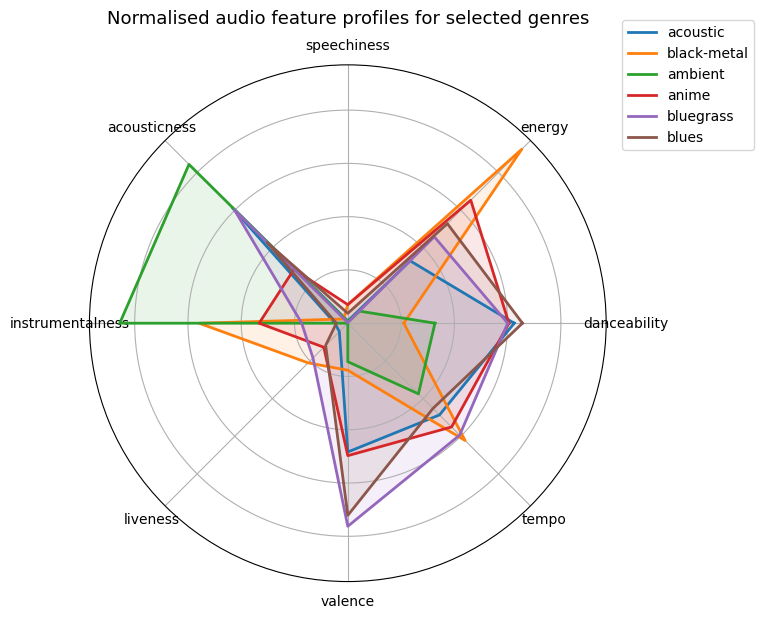

In [104]:
# Use these genres for the radar plot 
selected_genres = ["acoustic", "black-metal", "ambient", "anime", "bluegrass", "blues"]

# Keep only genres that actually exist in df_genre_feat
selected_genres = [g for g in selected_genres if g in df_genre_feat.index]
print("Genres used in radar plot:", selected_genres)

# Feature columns 
feat_cols = audio_feature_cols.copy()

# 1) Normalise features across genres to [0,1] so scales are comparable
feat_min = df_genre_feat[feat_cols].min()
feat_max = df_genre_feat[feat_cols].max()
feat_range = (feat_max - feat_min).replace(0, 1.0)

df_norm = (df_genre_feat[feat_cols] - feat_min) / feat_range

# 2) Radar plot setup
num_feats = len(feat_cols)
angles = np.linspace(0, 2 * np.pi, num_feats, endpoint=False)
angles = np.concatenate((angles, [angles[0]]))  # close the loop

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw={"projection": "polar"})

for g in selected_genres:
    vals = df_norm.loc[g, feat_cols].values
    vals = np.concatenate((vals, [vals[0]]))  # close the loop
    ax.plot(angles, vals, label=g, linewidth=2)
    ax.fill(angles, vals, alpha=0.1)

ax.set_xticks(angles[:-1])
ax.set_xticklabels(feat_cols, fontsize=10)
ax.set_yticklabels([])

ax.set_title("Normalised audio feature profiles for selected genres", fontsize=13, pad=30)
ax.legend(loc="upper right", bbox_to_anchor=(1.3, 1.1))
plt.tight_layout()
plt.show()

To compare genres in terms of their average audio profile, we normalised each
feature across all genres to the interval \([0,1]\) and plotted radar charts for
a few contrasting genres (*acoustic*, *black-metal*, *ambient*, *anime*,
*bluegrass*, *blues*). The shapes are very distinct: **black-metal** has
extremely high energy, relatively low acousticness and high instrumentalness,
whereas **ambient** is almost the opposite, with very high acousticness and
instrumentalness but low energy and speechiness. **Bluegrass** and **blues**
occupy a more mid-range region, with moderate danceability and energy but high
valence, while **acoustic** sits closer to singer-songwriter territory with
higher acousticness and lower tempo. These systematic differences confirm that
the per-genre feature vectors capture meaningful stylistic variation and can be
used to build a genre–genre similarity graph.


### GENRE–GENRE COSINE SIMILARITY MATRIX

In [108]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler


Off-diagonal similarity (z-scored) stats:
  min : -0.9513237409233336
  max : 1.0
  mean: 0.01574544659283497


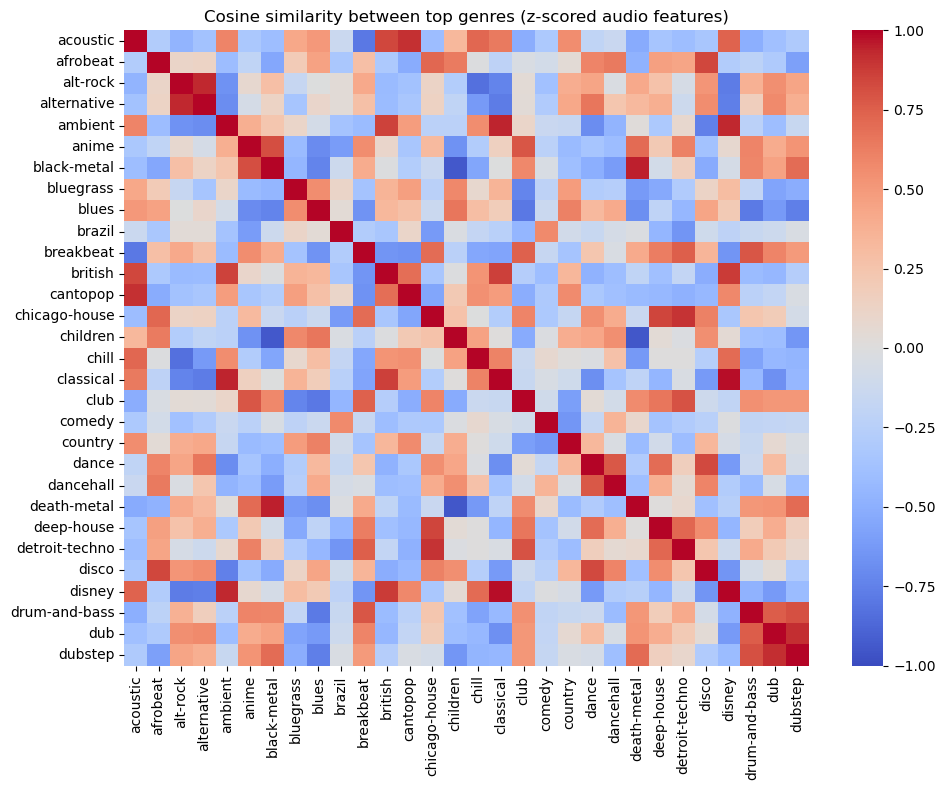

In [109]:
# 1) Z-score features across genres
scaler = StandardScaler()
X_z = scaler.fit_transform(df_genre_feat[audio_feature_cols].values)

# 2) Cosine similarity on z-scored vectors (≈ correlation)
S_z = cosine_similarity(X_z)

# Off-diagonal stats just to confirm we have variation
off_diag_z = S_z.copy()
np.fill_diagonal(off_diag_z, np.nan)
print("Off-diagonal similarity (z-scored) stats:")
print("  min :", np.nanmin(off_diag_z))
print("  max :", np.nanmax(off_diag_z))
print("  mean:", np.nanmean(off_diag_z))

# 3) Focus on top K genres by n_tracks for plotting
TOP_K_GENRES = 30
top_genres = df_genre_feat.sort_values("n_tracks", ascending=False).head(TOP_K_GENRES).index
idx_map = [genres_all.index(g) for g in top_genres]

S_top_z = S_z[np.ix_(idx_map, idx_map)]

plt.figure(figsize=(10, 8))
sns.heatmap(S_top_z, xticklabels=top_genres, yticklabels=top_genres,
            cmap="coolwarm", vmin=-1, vmax=1, center=0)
plt.title("Cosine similarity between top genres (z-scored audio features)")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

### GENRE SIMILARITY GRAPH + LOUVAIN COMMUNITIES

In [110]:
from networkx.algorithms.community import louvain_communities
from networkx.algorithms.community.quality import modularity

Genre graph: 114 nodes, 1949 edges (threshold = 0.3)
  Connected components: 1
  Largest component size: 114

Running Louvain on genre graph...
  Found 4 communities.
  Louvain modularity on genre graph (weighted): Q = 0.4431

Community sizes (id, |C|):
  Community 1: 41 genres
  Community 0: 36 genres
  Community 2: 29 genres
  Community 3: 8 genres

Example genres in each community (top by n_tracks):
  Community 1: hardstyle, anime, alternative
  Community 0: mandopop, idm, ambient
  Community 2: swedish, blues, french
  Community 3: comedy, mpb, forro

Plotting genre similarity graph with communities...


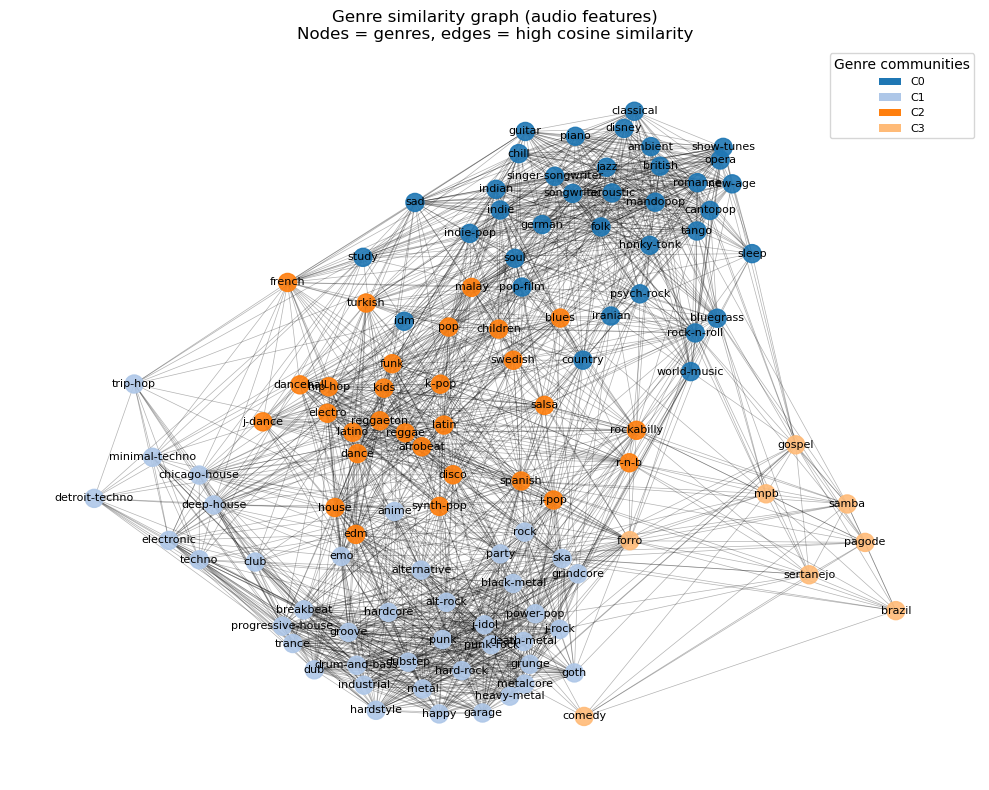

In [111]:
genres_all = df_genre_feat.index.tolist()
n_genres = len(genres_all)

# threshold for keeping edges (tune if graph too dense/sparse)
SIM_THRESHOLD = 0.3

G_genre = nx.Graph()
for g in genres_all:
    G_genre.add_node(
        g,
        n_tracks=int(df_genre_feat.loc[g, "n_tracks"])
    )

edge_count = 0
for i in range(n_genres):
    for j in range(i + 1, n_genres):
        w = S_z[i, j]
        if w > SIM_THRESHOLD:
            G_genre.add_edge(genres_all[i], genres_all[j], weight=float(w))
            edge_count += 1

print(f"Genre graph: {G_genre.number_of_nodes()} nodes, {edge_count} edges "
      f"(threshold = {SIM_THRESHOLD})")

# Check connectivity of largest component (optional)
components = list(nx.connected_components(G_genre))
components_sorted = sorted(components, key=len, reverse=True)
print(f"  Connected components: {len(components_sorted)}")
print(f"  Largest component size: {len(components_sorted[0])}")

# For community detection, we can work on the full graph
# (Louvain can handle multiple components)
# --- 2) Louvain communities on genre graph ---
print("\nRunning Louvain on genre graph...")
genre_comms = louvain_communities(G_genre, weight="weight", seed=42)
print(f"  Found {len(genre_comms)} communities.")

# Modularity (weighted)
Q_genre = modularity(G_genre, genre_comms, weight="weight")
print(f"  Louvain modularity on genre graph (weighted): Q = {Q_genre:.4f}")

# Build node -> community mapping
comm_map = {}
for cid, comm in enumerate(genre_comms):
    for g in comm:
        comm_map[g] = cid

# Community size summary
sizes = [(cid, len(nodes)) for cid, nodes in enumerate(genre_comms)]
sizes_sorted = sorted(sizes, key=lambda x: x[1], reverse=True)
print("\nCommunity sizes (id, |C|):")
for cid, sz in sizes_sorted:
    print(f"  Community {cid}: {sz} genres")

# Show a few example genres per community (top 3 by n_tracks)
print("\nExample genres in each community (top by n_tracks):")
for cid, comm in sizes_sorted:
    comm_genres = list(genre_comms[cid])
    comm_df = df_genre_feat.loc[comm_genres].sort_values("n_tracks", ascending=False)
    top_names = ", ".join(comm_df.head(3).index.tolist())
    print(f"  Community {cid}: {top_names}")

# --- 3) Visualisation ---
print("\nPlotting genre similarity graph with communities...")

# Use only the largest component for a cleaner plot
gcc_nodes = components_sorted[0]
H = G_genre.subgraph(gcc_nodes).copy()

pos = nx.spring_layout(H, seed=42, weight="weight", k=0.5)

# Colour by community
unique_comms = sorted({comm_map[g] for g in H.nodes()})
palette = sns.color_palette("tab20", n_colors=len(unique_comms))
color_map = {cid: palette[i] for i, cid in enumerate(unique_comms)}

node_colors = [color_map[comm_map[g]] for g in H.nodes()]

# Node size ~ log(n_tracks)
sizes = []
for g in H.nodes():
    n_t = H.nodes[g]["n_tracks"]
    sizes.append(100 + 10 * np.log1p(n_t))

plt.figure(figsize=(10, 8))
nx.draw_networkx_edges(H, pos, alpha=0.3, width=0.5)
nx.draw_networkx_nodes(H, pos, node_size=sizes, node_color=node_colors, alpha=0.9)

# Label only the larger genres for readability
for g in H.nodes():
    if H.nodes[g]["n_tracks"] >= 800:  # threshold for labelling
        x, y = pos[g]
        plt.text(x, y, g, fontsize=8, ha="center", va="center")

# Legend for communities
handles = [
    Patch(facecolor=color_map[cid], edgecolor="none", label=f"C{cid}")
    for cid in unique_comms
]
plt.legend(handles=handles, title="Genre communities", loc="upper right",
           frameon=True, fontsize=8)

plt.title("Genre similarity graph (audio features)\nNodes = genres, edges = high cosine similarity")
plt.axis("off")
plt.tight_layout()
plt.show()

To move from tracks to a more interpretable “map of genres”, we built a genre
similarity graph from the z-scored audio feature vectors. Each node is one of
the 114 `track_genre` labels, and an edge is added between two genres when
their cosine similarity exceeds 0.3. The resulting graph is connected with
**114 nodes and 1,949 edges**, so it is fairly dense but still leaves room for
structure.

Running the Louvain algorithm on this weighted genre graph yields **4
communities** with a modularity of **Q ≈ 0.44**, which indicates a reasonably
strong but not perfect community structure. The communities are not arbitrary:
they correspond to coherent bundles of genres in the audio feature space.
Roughly speaking, one community (C0) groups more **ambient / downtempo /
electronic** styles (e.g. *ambient, idm, mandopop*), another (C1) collects
**high-energy electronic and rock-adjacent genres** (e.g. *hardstyle, anime,
alternative*), a third (C2) contains more **acoustic / roots / regional**
styles (e.g. *swedish, blues, french*), and the smallest community (C3) picks
up a set of more **niche or region-specific genres** such as *comedy, mpb,
forró*. In the layout, these communities occupy overlapping but distinguishable
regions, showing that genres with similar average audio profiles tend to cluster
together, but the boundaries are fuzzy rather than perfectly separated.

This genre-level audio graph is the natural counterpart to the lyrics/TF–IDF
genre graph that will be built in the text-based part of the project. Comparing
the two will let us see where **audio similarity** and **lyrical similarity**
agree (genres that cluster together in both spaces) and where they diverge
(genres that sound similar but talk about different things, or vice versa).


### PCA EMBEDDING OF GENRES

In [ ]:
from sklearn.decomposition import PCA

Explained variance by PC1+PC2: 0.575


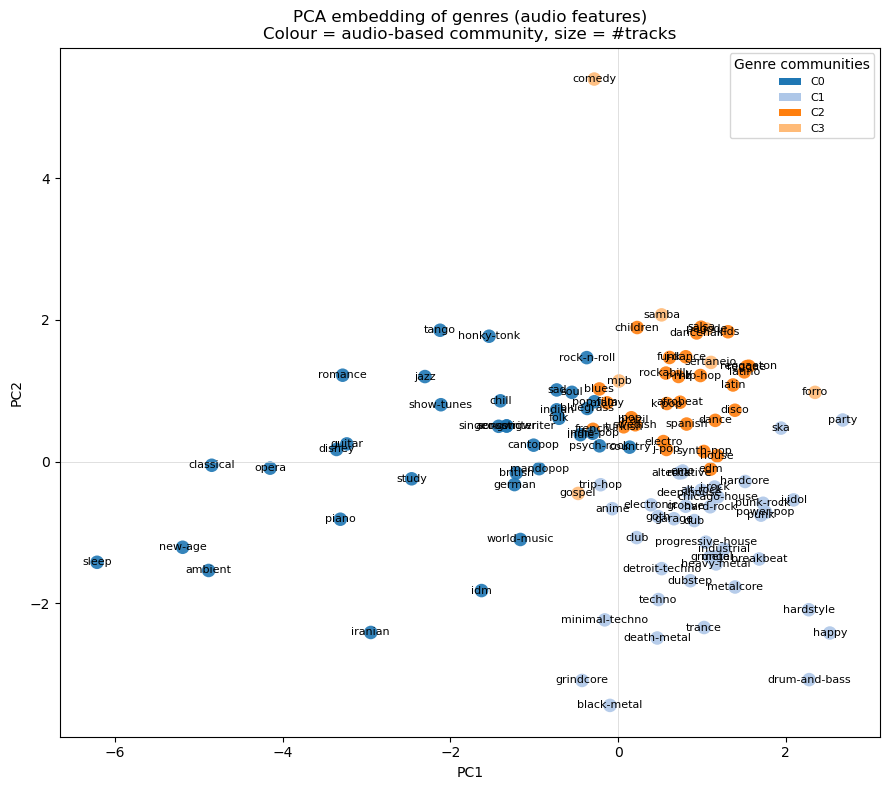

In [116]:
genres_all = df_genre_feat.index.tolist()
n_genres = len(genres_all)

# 1) PCA on z-scored vectors
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_z)

print("Explained variance by PC1+PC2:",
      f"{pca.explained_variance_ratio_.sum():.3f}")

# 2) Build colour map from communities
unique_comms = sorted({comm_map[g] for g in genres_all})
palette = sns.color_palette("tab20", n_colors=len(unique_comms))
color_map = {cid: palette[i] for i, cid in enumerate(unique_comms)}

colors = [color_map[comm_map[g]] for g in genres_all]

# Node size ~ log(n_tracks)
sizes = []
for g in genres_all:
    n_t = int(df_genre_feat.loc[g, "n_tracks"])
    sizes.append(40 + 8 * np.log1p(n_t))

plt.figure(figsize=(9, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1],
            s=sizes, c=colors, alpha=0.9, edgecolors="none")

# Label only big genres for readability
for i, g in enumerate(genres_all):
    n_t = int(df_genre_feat.loc[g, "n_tracks"])
    if n_t >= 800:  # threshold for labels
        plt.text(X_pca[i, 0], X_pca[i, 1], g,
                 fontsize=8, ha="center", va="center")

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA embedding of genres (audio features)\nColour = audio-based community, size = #tracks")
plt.axhline(0, color="lightgray", linewidth=0.5)
plt.axvline(0, color="lightgray", linewidth=0.5)

# Legend for communities
from matplotlib.patches import Patch
handles = [
    Patch(facecolor=color_map[cid], edgecolor="none", label=f"C{cid}")
    for cid in unique_comms
]
plt.legend(handles=handles, title="Genre communities", loc="upper right",
           frameon=True, fontsize=8)

plt.tight_layout()
plt.show()

Finally, we embedded the z-scored genre feature vectors into 2D using PCA. The
first two principal components together explain about **57.5%** of the total
variance, so the projection captures most of the structure present in the
audio features. When we colour each point (genre) by its audio-based Louvain
community and scale the point size by the number of tracks, the same four
communities from the genre graph reappear as partially overlapping “clouds”.
High-energy electronic and metal genres are concentrated on one side of PC1,
acoustic and ambient genres on the opposite side, while pop / dance / Latin
styles occupy a separate lobe along PC2. This confirms that the communities we
found on the genre similarity graph are not an artefact of thresholding, but
reflect coherent directions of variation in the underlying audio space.


### modularity summary table

In [ ]:
# --- helper: modularity for a node->community mapping ---
def modularity_from_partition(G, part_map, weight=None):
    comm_dict = {}
    for n, c in part_map.items():
        comm_dict.setdefault(c, set()).add(n)
    comms = list(comm_dict.values())
    return modularity(G, comms, weight=weight)

# Genre-based partition on track graph
#    rebuild mapping from track node -> its genre
G_tracks = G_gc_simple  # your giant component, simple graph
genre_map_nodes = {n: G_tracks.nodes[n].get("genre", "unknown")
                   for n in G_tracks.nodes()}
Q_genre_labels = modularity_from_partition(G_tracks, genre_map_nodes)

# 2) Louvain on track graph (unweighted) + modularity
comms_track = louvain_communities(G_tracks, seed=42)
Q_louvain_tracks = modularity(G_tracks, comms_track)

# 3) Louvain on genre graph (audio similarity)
Q_genre_graph = Q_genre  

# Build summary table
df_mod = pd.DataFrame([
    {
        "level": "tracks",
        "partition": "given genres",
        "graph": "track k-NN",
        "modularity_Q": Q_genre_labels,
    },
    {
        "level": "tracks",
        "partition": "Louvain",
        "graph": "track k-NN",
        "modularity_Q": Q_louvain_tracks,
    },
    {
        "level": "genres",
        "partition": "Louvain (audio similarity)",
        "graph": "genre similarity graph",
        "modularity_Q": Q_genre_graph,
    },
])

display(df_mod)

,level,partition,graph,modularity_Q
0,tracks,given genres,track k-NN,0.112158
1,tracks,Louvain,track k-NN,0.858082
2,genres,Louvain (audio similarity),genre similarity graph,0.443074


To compare how different partitions capture community structure, we summarised
modularity values across three cases. Using the given `track_genre` labels as a
partition on the full track k-NN graph yields a low modularity of
\(Q \approx 0.11\), meaning that the raw genre tags only weakly align with the
actual similarity structure between tracks. In contrast, a Louvain partition on
the same track graph achieves a very high modularity
(\(Q \approx 0.86\)), showing that the network contains a strong intrinsic
community structure that goes well beyond the official genre labels. On the
coarser genre similarity graph built from average audio features, Louvain finds
communities with intermediate modularity (\(Q \approx 0.44\)), indicating that
genres themselves cluster into meaningful audio regions, but these clusters are
less sharply separated than the communities at the track level. Overall, this
confirms that (i) the k-NN graph has strong community structure, (ii) genre
labels explain only a small part of it, and (iii) audio-based genre
communities capture broad stylistic zones rather than perfectly isolated
groups—providing a natural baseline for comparison with the lyric-based
(TF–IDF) communities in the text analysis.
